# 1) Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import ast

# 2) Importando Base de Dados

In [2]:
df_json = pd.read_json('realties.json')
df_json.head()

_id    _index  _score  \
2  LOr6iGcB_HRRL6pG3mnW  realties       1   
3  Ler6iGcB_HRRL6pG3mnb  realties       1   
7  5er7iGcB_HRRL6pG1Wn-  realties       1   
8  5ur7iGcB_HRRL6pG1mkB  realties       1   
9  3Or7iGcB_HRRL6pGxGl1  realties       1   

                                             _source   _type  
2  {'error': [], 'uf': 'PR', 'longitude': -49.278...  imovel  
3  {'error': [], 'uf': 'PR', 'longitude': -49.280...  imovel  
7  {'quarto': 3, 'error': [], 'uf': 'PR', 'longit...  imovel  
8  {'quarto': 4, 'error': [], 'uf': 'PR', 'longit...  imovel  
9  {'anunciante': {'id': '411cbb1b8d58afa3b9419a1...  imovel

# 3) Tratamento de Base


Aparentemente, todos os dados relevantes estão concentrados na coluna _scource. Vamos realizar uma tratativa com os dados dessa coluna.

## 3.1) Coluna _source

A coluna possui um dicionário com diferentes Keys, sendo necessário malipula-la.

In [3]:
df_json['_source']

2         {'error': [], 'uf': 'PR', 'longitude': -49.278...
3         {'error': [], 'uf': 'PR', 'longitude': -49.280...
7         {'quarto': 3, 'error': [], 'uf': 'PR', 'longit...
8         {'quarto': 4, 'error': [], 'uf': 'PR', 'longit...
9         {'anunciante': {'id': '411cbb1b8d58afa3b9419a1...
                                ...                        
183044    {'scraping': {'spider_name': 'vivareal_curitib...
183045    {'scraping': {'spider_name': 'vivareal_curitib...
183046    {'scraping': {'spider_name': 'vivareal_curitib...
183047    {'scraping': {'spider_name': 'vivareal_curitib...
183048    {'scraping': {'spider_name': 'vivareal_curitib...
Name: _source, Length: 149968, dtype: object

### Número de colunas

In [4]:
# Linha 2
len(df_json['_source'].iloc[1])

37

In [5]:
# Linha 5
len(df_json['_source'].iloc[4])

34

In [6]:
# Lista colunas informadas no PDF
lista_colunas = ['valor', 'descricao', 'area_util', 'quarto', 'uf',
                 'latitude', 'longitude', 'tipo_imovel', 'lista_fotos', 'garagem',
                 'banheiro', 'opcionais', 'iptu', 'spider_name', 'numero_corretor', 'isportal',
                 'isparticular', 'zoneamento', 'area_total', 'tipo_negocio', 'tipo_negocio', 'url',
                 'condominio', 'status', 'codigo', 'geometry', 'cidade', 'nome_corretor', 'cidade_uf'
                 'bairro', 'anunciante', 'geohash', 'title', 'endereco', 'area_privativa']
len(lista_colunas)

34

Existem outras colunas além do informado pelo PDF. Logo, é necessário construir um tratamento com todas as colunas possíveis

### Construindo Lista com todas as colunas possíveis

In [7]:
# Número de Linhas
print(f'Número de linhas igual a {df_json.shape[0]}')

Número de linhas igual a 149968


In [8]:
# Colunas Possíveis
lista_colunas_possiveis = []

for i in range(df_json.shape[0]):
    for palavra in df_json['_source'].iloc[i]:
        if palavra not in lista_colunas_possiveis:
            lista_colunas_possiveis.append(palavra)

colunas = len(lista_colunas_possiveis)
print(f'Número de colunas diferentes igual a {colunas}')    

Número de colunas diferentes igual a 56


In [9]:
# Armazenando em uma Lista todas as informações encontradas para cada coluna
lista_total = []
for palavra in lista_colunas_possiveis:
    lista = []
    for i in range(df_json.shape[0]): 
        lista.append(df_json['_source'].iloc[i].get(palavra, None))
    lista_total.append(lista)
len(lista_total)

56

In [10]:
# Construindo DataFrame com valores referentes a cada Coluna
df = pd.DataFrame(lista_total).T
pd.set_option('display.max_columns', 500)
df.columns = lista_colunas_possiveis
df.head()

error  uf longitude                                                url  \
0    []  PR  -49.2785  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR  -49.2804  http://www.redebee.com.br/imovel/studio-reside...   
2    []  PR  -49.3491  http://www.redebee.com.br/imovel/casa-residenc...   
3    []  PR    -49.35  http://www.redebee.com.br/imovel/casa-residenc...   
4    []  PR  -49.2369  http://www.redebee.com.br/imovel/loja-comercia...   

                                            geometry condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...        590  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.28036499...        356  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.34909439...        400  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.35003280...        620  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.2368575,...       None  curitiba_pr   

                                            scraping       default area_util  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  [finalidade]       131   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  [finalidade]        36   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  [finalidade]      None   
3  {'spider_name': 'redebee_curitiba_pr', 'padrao...  [finalidade]      None   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  [finalidade]        23   

  area_total contato_imobiliaria    valor isportal isparticular  \
0        131     (41) 99165-0629     1590    False        False   
1         69     (41) 99165-0629     1200    False        False   
2       None     (41) 99165-0629   714200    False        False   
3       None     (41) 99165-0629  1577800    False        False   
4         23     (41) 99165-0629      650    False        False   

                 nome_corretor banheiro tipo_negocio quarto status  \
0  Gomes Consultor Imobiliário        2      Locação      2      1   
1  Gomes Consultor Imobiliário        1      Locação      1      1   
2         Imobiliária Casteval        3        Venda      3      1   
3         Imobiliária Casteval        5        Venda      4      1   
4                    Otimóveis        1      Locação   None      1   

                                               title  \
0  Apartamento de 131 m² na Rua Comendador Araújo...   
1  Studio de 36 m² na Rua Visconde de Nacar, 529 ...   
2  Casa de 126 m² na Rua João Dembinski, 515 - Ca...   
3  Casa de 244 m² na Rua Carlos Benato, 640 - San...   
4  Loja de 23 m² Boqueirão - Curitiba, para aluga...   

                                           opcionais latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.4356   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.4275   
2  [{'location': ['imovel'], 'category': 'Seguran... -25.4532   
3  [{'location': ['imovel'], 'category': 'Cômodo'... -25.4064   
4                                                 [] -25.5031   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Prezado (a) Senhor (a). Muito obrigado por ent...   
2  Essa é para você que além da Casa nova também ...   
3  Construção Impecavél e com excelente acabament...   
4  Loja de 23m² reformada com 01 bwc com frente p...   

                                         lista_fotos  \
0  [https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJRD...   
1  [https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJRD...   
2  [https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJRD...   
3  [https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJRD...   
4  [https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJRD...   

                    

In [11]:
#Salvar relatório para não rodar todas as vezes
df.to_csv('base_corrigida.csv', index = False)

In [12]:
df = pd.read_csv('base_corrigida.csv', low_memory=False)
df.head()

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.280365  http://www.redebee.com.br/imovel/studio-reside...   
2    []  PR -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3    []  PR -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
4    []  PR -49.236857  http://www.redebee.com.br/imovel/loja-comercia...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...       590.0  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.28036499...       356.0  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.34909439...       400.0  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.35003280...       620.0  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.2368575,...         NaN  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       36.0        69.0     (41) 99165-0629     1200.0     False   
2        NaN         NaN     (41) 99165-0629   714200.0     False   
3        NaN         NaN     (41) 99165-0629  1577800.0     False   
4       23.0        23.0     (41) 99165-0629      650.0     False   

   isparticular                nome_corretor  banheiro tipo_negocio  quarto  \
0         False  Gomes Consultor Imobiliário       2.0      Locação     2.0   
1         False  Gomes Consultor Imobiliário       1.0      Locação     1.0   
2         False         Imobiliária Casteval       3.0        Venda     3.0   
3         False         Imobiliária Casteval       5.0        Venda     4.0   
4         False                    Otimóveis       1.0      Locação     NaN   

   status                                              title  \
0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1       1  Studio de 36 m² na Rua Visconde de Nacar, 529 ...   
2       1  Casa de 126 m² na Rua João Dembinski, 515 - Ca...   
3       1  Casa de 244 m² na Rua Carlos Benato, 640 - San...   
4       1  Loja de 23 m² Boqueirão - Curitiba, para aluga...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.427486   
2  [{'location': ['imovel'], 'category': 'Seguran... -25.453186   
3  [{'location': ['imovel'], 'category': 'Cômodo'... -25.406399   
4                                                 [] -25.503107   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Prezado (a) Senhor (a). Muito obrigado por ent...   
2  Essa é para você que além da Casa nova também ...   
3  Construção Impecavél e com excelente acabament...   
4  Loja de 23m² reformada com 01 bwc com frente p...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp

### Formato das colunas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149968 entries, 0 to 149967
Data columns (total 56 columns):
error                    149968 non-null object
uf                       149968 non-null object
longitude                119632 non-null float64
url                      149968 non-null object
geometry                 119593 non-null object
condominio               109536 non-null float64
cidade_uf                149968 non-null object
scraping                 149968 non-null object
default                  149968 non-null object
area_util                121362 non-null float64
area_total               106192 non-null float64
contato_imobiliaria      16729 non-null object
valor                    148506 non-null float64
isportal                 149968 non-null bool
isparticular             149968 non-null bool
nome_corretor            9584 non-null object
banheiro                 111725 non-null float64
tipo_negocio             149968 non-null object
quarto                   1

## 3.2) Identificando e Removendo Dados Duplicados e Nulos

### 1° Verificação : Possibilidade de Duplicação pelo WebScrapping

Estamos verificando se durante o processo de WebScrapping a mesma linha de um site foi armazenada duas ou mais vezes, ou seja, os valores serão exatamente os mesmos, apenas variando a hora em que foi armazenado.

In [14]:
# Criando Lista sem data de inclusão
lista_verificacao_1 = []
for coluna in lista_colunas_possiveis:
    if coluna != 'data_inclusao':
        lista_verificacao_1.append(coluna)


In [15]:
# Verificando diferença do tamanho de listas
print(len(lista_verificacao_1), len(lista_colunas_possiveis))

55 56


In [16]:
# Linhas com valores iguais
verificacao_1 = df[df.duplicated(lista_verificacao_1,keep=False)]
verificacao_1.shape[0]
print(f'Número de linhas com valores duplicados igual a {verificacao_1.shape[0]}')

Número de linhas com valores duplicados igual a 238


In [17]:
# Eliminado Linhas duplicadas
df_1 = df.drop_duplicates(lista_verificacao_1,keep='first')
df_1.shape

(149849, 56)

### 2° Verificação: Possibilidade de o mesmo imóvel ser anunciado em 2 sites distintos

Estamos verificando a possibilidade de um anunciante ter divulgado o mesmo imóvel em dois sites diferentes. Esse erro parece ser mais provável de acontecer, visto que é comum um mesmo imóvel ser anunciando em diferentes sites para aumentar o alcançe de visualizações.

In [18]:
# Conferindo se existe alguma variação entre a nomeclarura de Venda e Locação (Ex: Aluguel e Locação)
df_1.tipo_negocio.value_counts()

Venda      123529
Locação     26320
Name: tipo_negocio, dtype: int64

Para identificar esse caso, utilizaremos o presuposto de que o valor exigido pelo imóvel, a localização (latitude e longitude), o tipo do negócio, e informações básicas (n° banheiros, garagem, quartos) sejam iguais.

In [19]:
# Construindo lista para verificação dos itens listados
lista_verificacao_2 = ['valor', 'latitude', 'longitude', 'tipo_negocio', 'banheiro', 'quarto', 'area_util']

In [20]:
# Dados Dupicados 
verificacao_2 = df_1[df_1.duplicated(lista_verificacao_2,keep=False)]
verificacao_2.shape[0]
print(f'Número de linhas com valores duplicados igual a {verificacao_2.shape[0]}')

Número de linhas com valores duplicados igual a 39294


In [21]:
# Eliminado Linhas duplicadas
df_2 = df_1.drop_duplicates(lista_verificacao_2,keep='first')
df_2.shape


(124038, 56)

Caso a descriação do imóvel, que é um texto livre, seja exatamente igual, também é grande a chance de o imóvel estar duplicado. Isso pode ocorrer devido repostagem do vendedor, para evitar que o anúncio fique muito antigo.

In [22]:
# Construindo lista para verificação dos itens listados
lista_verificacao_2 = ['valor', 'latitude', 'longitude', 'descricao']

In [23]:
# Dados Dupicados 
verificacao_2 = df_2[df_2.duplicated(lista_verificacao_2,keep=False)]
verificacao_2.shape[0]
print(f'Número de linhas com valores duplicados igual a {verificacao_2.shape[0]}')

Número de linhas com valores duplicados igual a 1254


In [24]:
# Eliminado Linhas duplicadas
df_2 = df_2.drop_duplicates(lista_verificacao_2,keep='first')
df_2.shape

(123326, 56)

### 3° Verificação: Removendo valores nulos

Para linhas as quais não há dados referentes ao valor exigido para o imóvel, retiraremos da base já que essa é uma informação essencial (Variável Dependente no nosso estudo).

In [25]:
# Linhas sem valor do imóvel
selecao = df_2['valor'].isnull()
verificacao_3 = df_2[selecao]
verificacao_3.shape[0]
print(f'Número de linhas nulas {verificacao_3.shape[0]}')

Número de linhas nulas 1093


In [26]:
# Eliminado linhas 
df_3 = df_2[~selecao]
df_3.shape

(122233, 56)

### 4° Verificação: Finalidade Imóveis

Grande Parte da coluna finalidade dos imóveis não tem especificação, como mostra abaixo:

In [27]:
df_3['finalidade'].value_counts()

['Residencial']                 81012
[]                              27124
['Comercial']                   11813
['Industrial']                   1851
['Comercial', 'Residencial']      181
['Residencial', 'Comercial']      101
['Rural']                          60
['Comercial', 'Industrial']        49
['Industrial', 'Comercial']        40
['Turístico']                       2
Name: finalidade, dtype: int64

In [28]:
# Representatividade das 4 primeiras linhas
Representatividade = sum(df_3['finalidade'].value_counts()[0:4])/sum(df_3['finalidade'].value_counts())*100
print(f'As 4 Primeiras classificações representam {Representatividade :.2f}% do total')

As 4 Primeiras classificações representam 99.65% do total


Devido a essa grande representatividade, iremos apenas utilizar os imóveis dentro dessa 4 categorias. Porém, existe uma grande quantide de imóveis vazios. Vamos entender como funciona a coluna 'tipo_imovel' para melhorar essa situação.

In [29]:
# Array com todos as possibilidades da Coluna Finalidade
array_finalidade = df_3['finalidade'].value_counts()
# Array com todos os imóveis para a Finalidade não definida
selecao = df_3['finalidade'] == array_finalidade.index[1]
# Verifiar quais são os tipos de Imóveis para a finalidade não definida
df_3[selecao].tipo_imovel.value_counts()

['Apartamento']                            15017
['Casa']                                    4110
['Sobrado']                                 2012
['Terreno']                                 1447
['Loja']                                     440
                                           ...  
['Sala', 'Quarto']                             1
['Triplex', 'Sobrado', 'Quarto']               1
['Loft', 'Sobrado']                            1
['Terreno', 'Loja', 'Galpão']                  1
['Cobertura', 'Terreno', 'Apartamento']        1
Name: tipo_imovel, Length: 256, dtype: int64

Nota-se que mesmo com a coluna 'tipo_imovel' para auxiliar, existem 256 classificações possível. Exigiria muito trabalho para realizar a leitura dos 256 itens e classifica-los entre Residencial, Comercial, Industria. Dessa forma, vamos utilizar o princípio de pareto e apenas categorizar aqueles que possuem maior representatividade da amostra.

In [30]:
# Total de Imóveis sem a coluna finalidade
finalidade_vazios = df_3['finalidade'].value_counts()[1]
# Total dos top 15 Tipos de Imóveis com mais frequência
tipo_imovel_top15 = sum(df_3[selecao].tipo_imovel.value_counts()[0:15])
# Reprensentatividade
Representatividade = tipo_imovel_top15/finalidade_vazios*100
print(f'A representatividade dos 15 primetos tipos de imóvel é igual a {Representatividade :.2f} %')

A representatividade dos 15 primetos tipos de imóvel é igual a 93.89 %


In [31]:
# Lista coluna das top 15 tipo_imóveis
df_3[selecao].tipo_imovel.value_counts()[0:15].index

Index(['['Apartamento']', '['Casa']', '['Sobrado']', '['Terreno']', '['Loja']',
       '['Galpão']', '['Quarto', 'Apartamento']', '['Cobertura']',
       '['Prédio']', '['Quarto']', '['Kitnet']', '['Studio']', '['Sala']',
       '['Duplex', 'Cobertura']', '['Andar']'],
      dtype='object')

In [32]:
# Construindo Classificação DataFrame
lista_top_15 = df_3[selecao].tipo_imovel.value_counts()[0:15].index
lista_top_15_finalidade = ['Residencial', 'Residencial', 'Residencial', 'Residencial', 'Comercial', 'Industrial', 'Residencial', 
                           'Residencial', 'Residencial', 'Residencial', 'Residencial', 'Residencial', 'Residencial', 'Residencial',
                           'Residencial']
df_auxiliar = pd.DataFrame(lista_top_15, columns = ['tipo_imovel'])
df_auxiliar['finalidade'] = lista_top_15_finalidade
df_auxiliar

tipo_imovel   finalidade
0             ['Apartamento']  Residencial
1                    ['Casa']  Residencial
2                 ['Sobrado']  Residencial
3                 ['Terreno']  Residencial
4                    ['Loja']    Comercial
5                  ['Galpão']   Industrial
6   ['Quarto', 'Apartamento']  Residencial
7               ['Cobertura']  Residencial
8                  ['Prédio']  Residencial
9                  ['Quarto']  Residencial
10                 ['Kitnet']  Residencial
11                 ['Studio']  Residencial
12                   ['Sala']  Residencial
13    ['Duplex', 'Cobertura']  Residencial
14                  ['Andar']  Residencial

In [33]:
# Lista com categorias de finalidades possíveis
lista_finalidade=[df_3['finalidade'].value_counts().index[0], df_3['finalidade'].value_counts().index[2], df_3['finalidade'].value_counts().index[3]]
lista_finalidade

["['Residencial']", "['Comercial']", "['Industrial']"]

In [34]:
# Lista das 15 categorias que são residenciais
lista_residencial =  df_auxiliar[df_auxiliar['finalidade'] == 'Residencial'].tipo_imovel.values
lista_residencial

array(["['Apartamento']", "['Casa']", "['Sobrado']", "['Terreno']",
       "['Quarto', 'Apartamento']", "['Cobertura']", "['Prédio']",
       "['Quarto']", "['Kitnet']", "['Studio']", "['Sala']",
       "['Duplex', 'Cobertura']", "['Andar']"], dtype=object)

In [35]:
# Construindo lista com classificação dos imóveis
lista_residencial = df_auxiliar[df_auxiliar['finalidade'] == 'Residencial'].tipo_imovel.values
lista_classficação = []
for i in range(df_3.shape[0]):
    if df_3['finalidade'].iloc[i] == array_finalidade.index[1]:
        tipo_imovel = df_3['tipo_imovel'].iloc[i]
        if tipo_imovel == 'Loja':
            lista_classficação.append("['Comercial']")
        elif tipo_imovel == 'Galpão':
            lista_classficação.append("['Industrial']")
        elif tipo_imovel in lista_residencial:
            lista_classficação.append("['Residencial']")
        else:
            lista_classficação.append("['Desconsiderar']")
    elif df_3['finalidade'].iloc[i] in lista_finalidade:
        lista_classficação.append(df_3['finalidade'].iloc[i])
    else:
        lista_classficação.append("['Desconsiderar']")
len(lista_classficação)

122233

In [36]:
# Conferindo tamanho de lista com data Frame
print(len(lista_classficação), df_3.shape[0])

122233 122233


In [37]:
# Exportando base para poder salver coluna
df_3.to_csv('base_tratada.csv', index = False)
df_3 = pd.read_csv('base_tratada.csv', low_memory=False)

In [38]:
# Construindo coluna com classificação imóveis
df_3['Classificacao'] = lista_classficação
df_3['Classificacao'].value_counts()

['Residencial']      105619
['Comercial']         11813
['Desconsiderar']      2950
['Industrial']         1851
Name: Classificacao, dtype: int64

In [39]:
# Excluindo imóveis sem categoria
selecao = df_3['Classificacao'] != "['Desconsiderar']"
df_4 = df_3[selecao]
df_4.shape

(119283, 57)

## 3.4) Removendo Outliers

In [40]:
# Defindo palheta de cores
sns.set_style("darkgrid")
sns.set_palette("Accent")

### Localização

Vamos analisar primeiramente como estão as coordenadas dos nossos imóveis. Como todos são da cidade de Curitiba, não deve haver grandes variações.

Text(0, 0.5, 'Coordenada')

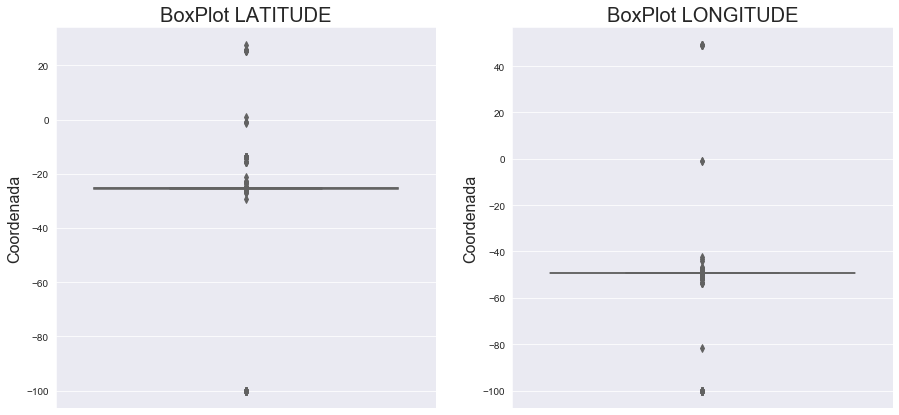

In [41]:
#Longitude e Latitude
f, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(y = df_4['latitude'], ax=axes[0])
axes[0].set_title('BoxPlot LATITUDE', fontsize = 20)
axes[0].set_ylabel('Coordenada', fontsize = 16)


sns.boxplot(y = df_4['longitude'], ax=axes[1])
axes[1].set_title('BoxPlot LONGITUDE', fontsize = 20)
axes[1].set_ylabel('Coordenada', fontsize = 16)

In [42]:
# Existem valores muito discrepantes nas coordenadas informadas. Provavelmente algumas informações foram passadas erradas.

Para entender quais posições estão com localização incorreta, utilizamos o site https://www.openstreetmap.org/export, selecionamos a área da cidade de Curitiba. Os valores que não pertencem ao espaço serão consiredaos como informações incorretas.

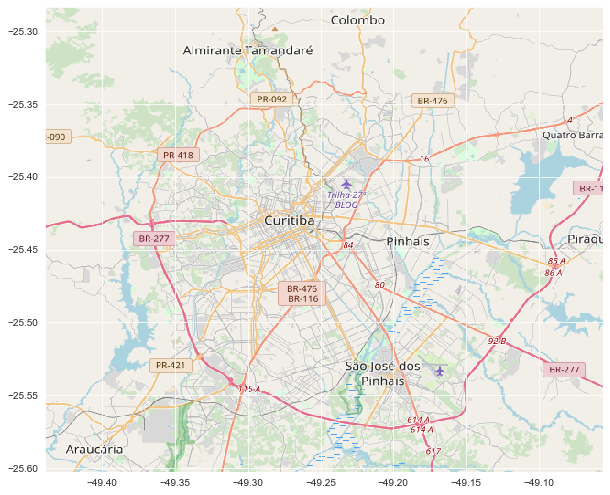

In [43]:
# Definindo Extremos e Carregando Imagem GoogleMaps
BB = (-49.4392, -49.0560, -25.6026, -25.2834)
Curitiba = plt.imread('Mapa_Curitiba_ZoomOut.png')
# Link extrair mapa https://www.openstreetmap.org/export#map=11/-25.4557/-49.2222
fig = plt.figure(figsize=(10, 10))
axs = plt.imshow(Curitiba,  zorder=0, extent=BB)

In [44]:
# Base Apenas com Coordenadas Dentro da Área Delimitada
selecao = (df_4['longitude'] >=BB[0]) & (df_4['longitude'] <=BB[1]) & (df_4['latitude'] >=BB[2]) & (df_4['latitude'] <=BB[3])
df_5 = df_4[selecao]
df_5.shape

(99132, 57)

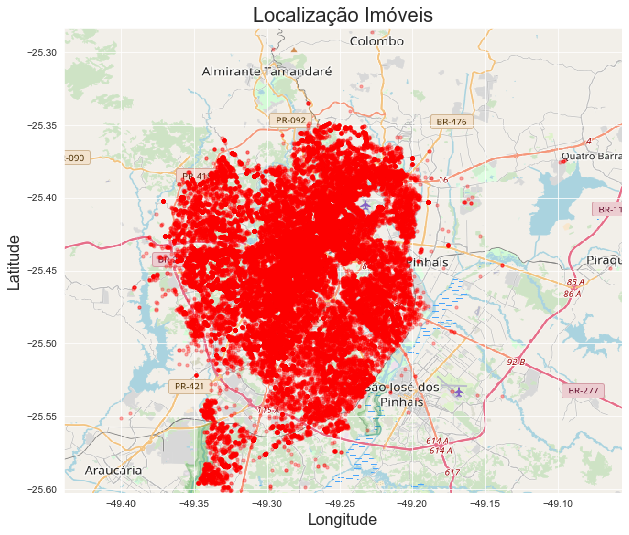

In [45]:
# Dados no mapa
fig = plt.figure(figsize=(10,10))

g1 = fig.add_subplot(1, 1, 1)
g1.scatter(df_5.longitude, df_5.latitude, zorder=1, alpha=0.3, c='r', s=10)
g1.imshow(Curitiba, zorder=0, extent=BB)
g1.set_xlim((BB[0], BB[1]))
g1.set_ylim((BB[2], BB[3]))
g1.set_title('Localização Imóveis', fontsize = 20)
g1.set_ylabel('Latitude', fontsize = 16)
g1.set_xlabel('Longitude', fontsize = 16)
g1

In [46]:
# Cabe aqui ressaltar que onde esta localizado o aeroporto central de Curitiba, não existe nenhum imóvel próximo. 

### Área Imóveis

Vamos enteder com é a variação dos tamanhos dos terrenos. 

In [47]:
sum(df_5['area_util'].isnull())

16101

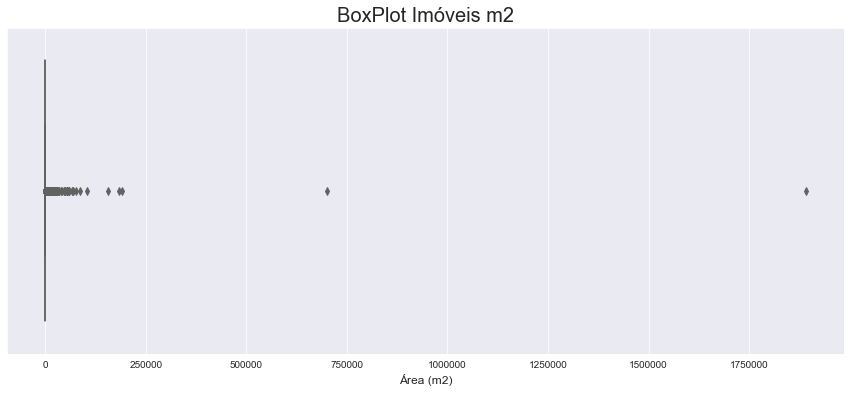

In [48]:
# Criação do Boxplot por m2
fig, ax = plt.subplots()
sns.boxplot(y = df_5['area_util'], orient="h")
ax.set_title('BoxPlot Imóveis m2', fontsize = 20)
ax.set_xlabel('Área (m2)', fontsize = 12)
fig.set_size_inches(15, 6)

ax

Embora exista uma grande variação dos imóveis, dependendo do setor em que ele esta classificado, faz sentido a sua dimensão. É esperado a ordem de grandeza da área de um galpão seja muito maior que a de uma casa. Por isso, vamos realizar o boxplot por tipo de imóvel.  

In [49]:
df_5['tipo_imovel'].value_counts()

['Apartamento']                                    36686
['Casa']                                            9836
['Sobrado']                                         8673
['Terreno']                                         6265
['Apartamento', 'Residencia']                       5456
                                                   ...  
['Studio', 'Pousada']                                  1
['Studio', 'Andar', 'Apartamento']                     1
['Garden', 'Garagem', 'Terreno', 'Apartamento']        1
['Sobrado', 'Sala']                                    1
['Duplex', 'Cobertura', 'Andar', 'Apartamento']        1
Name: tipo_imovel, Length: 617, dtype: int64

O número de valores é muito grande, sendo impossível de analisar 617 boxplot. Logo, mais uma vez utilizaremos o princípio de pareto para nos ajudar a reduzir a amostra dos dados.

In [50]:
# Número de Linhas totais da amostra
total = sum(df_5['tipo_imovel'].value_counts())
# Total dos top 15 Tipos de Imóveis com mais frequência
top_15 = sum(df_5['tipo_imovel'].value_counts()[0:15])
# Reprensentatividade
Representatividade = top_15/total*100
print(f'A representatividade dos 15 primetos tipos de imóvel é igual a {Representatividade :.2f} %')

A representatividade dos 15 primetos tipos de imóvel é igual a 86.75 %


In [51]:
# Visualizar top15
df_5['tipo_imovel'].value_counts()[0:15]

['Apartamento']                  36686
['Casa']                          9836
['Sobrado']                       8673
['Terreno']                       6265
['Apartamento', 'Residencia']     5456
['Quarto', 'Apartamento']         3151
['Sala']                          3104
['Conjunto']                      2388
['Cobertura']                     2062
['Loja']                          1972
['Residencia', 'Sobrado']         1537
['Sala', 'Conjunto']              1532
['Residencia', 'Casa']            1268
['Terreno', 'Residencia']         1079
['Residencia', 'Apartamento']      986
Name: tipo_imovel, dtype: int64

In [52]:
# Construindo Classificação DataFrame
lista_top_15 = df_5['tipo_imovel'].value_counts()[0:15].index
lista_top_15_tipo_imoves = ['Apartamento', 'Casa','Sobrado', 'Terreno', 'Apartamento', 'Apartamento', 'Sala',
                            'Sala', 'Apartamento', 'Loja', 'Sobrado', 'Sala', 'Casa','Terreno', 'Apartamento']
df_auxiliar = pd.DataFrame(lista_top_15, columns = ['tipo_imovel'])
df_auxiliar['tipo_imovel_2'] = lista_top_15_tipo_imoves
df_auxiliar

tipo_imovel tipo_imovel_2
0                 ['Apartamento']   Apartamento
1                        ['Casa']          Casa
2                     ['Sobrado']       Sobrado
3                     ['Terreno']       Terreno
4   ['Apartamento', 'Residencia']   Apartamento
5       ['Quarto', 'Apartamento']   Apartamento
6                        ['Sala']          Sala
7                    ['Conjunto']          Sala
8                   ['Cobertura']   Apartamento
9                        ['Loja']          Loja
10      ['Residencia', 'Sobrado']       Sobrado
11           ['Sala', 'Conjunto']          Sala
12         ['Residencia', 'Casa']          Casa
13      ['Terreno', 'Residencia']       Terreno
14  ['Residencia', 'Apartamento']   Apartamento

In [53]:
# Construindo lista com cateogorias
lista_classificacao = []
for i in range(df_5.shape[0]):
    tipo_imovel = df_5['tipo_imovel'].iloc[i]
    if tipo_imovel in lista_top_15:
        lista_classificacao.append(df_auxiliar[df_auxiliar['tipo_imovel'] == tipo_imovel].iloc[0,1])
    else:
        lista_classificacao.append(None)
len(lista_classificacao)

99132

In [54]:
# Construindo lista com cateogorias
lista_classificacao = []
for i in range(df_5.shape[0]):
    tipo_imovel = df_5['tipo_imovel'].iloc[i]
    if tipo_imovel in lista_top_15:
        selecao = df_auxiliar['tipo_imovel'] == tipo_imovel
        lista_classificacao.append(df_auxiliar[selecao].iloc[0,1])
    else:
        lista_classificacao.append(None)
len(lista_classificacao)

99132

In [55]:
# Conferindo tamanho de lista com data Frame
print(len(lista_classificacao), df_5.shape[0])

99132 99132


In [56]:
# Construindo coluna de classificacao
df_5['tipo_imovel_2'] = lista_classificacao

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
# Construindo Base apenas com categorias listadas
selecao = df_5['tipo_imovel_2'].isnull()
df_6 = df_5[~selecao]

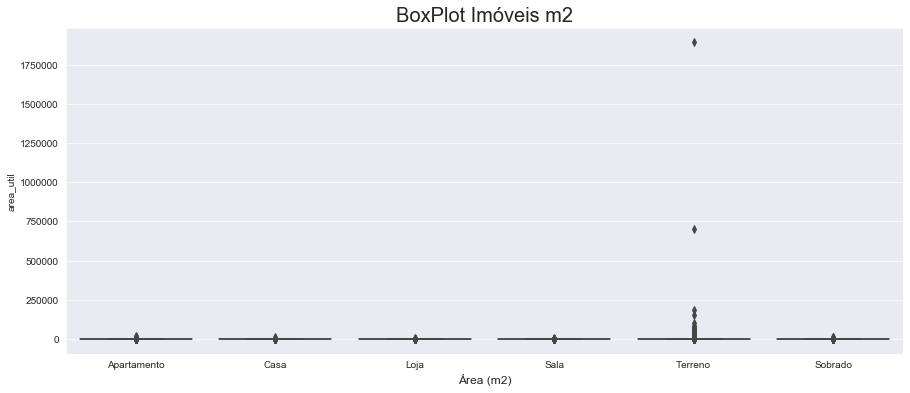

In [58]:
# BoxPlot
fig, ax = plt.subplots()
sns.boxplot(y = 'area_util', x='tipo_imovel_2', data = df_6)
ax.set_title('BoxPlot Imóveis m2', fontsize = 20)
ax.set_xlabel('Área (m2)', fontsize = 12)
fig.set_size_inches(15, 6)

ax

Agora percebemos que os valores variam muito na coluna terreno. Vamos apagar todas os valores os quais estiverem fora do intervalo do boxplot apra cada uma das categorias.

In [59]:
# Vamos remover os valores da segundo o boxplot
grupo_tipo = df_6.groupby('tipo_imovel_2')['area_util']

In [60]:
# Boxplot
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [61]:
df_7 = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = df_6['tipo_imovel_2'] == tipo
    eh_dentro_limite = (df_6['area_util'] >= limite_inferior[tipo]) & (df_6['area_util'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = df_6[selecao]
    df_7 = pd.concat([df_7, dados_selecao])


In [62]:
df_7.shape[0]

65448

### Desvio Padrão

Com intuito de desprezar valores extremamentes grandes que residuaram na amostra, vamos remover para a coluna 'valor', de acordo com o tipo_imovel e tipo_locação. Iremos adortar uma tolerância de 2 vezes o desvio padrão da amostra.


In [63]:
#Salvar relatório para não rodar todas as vezes
df_7.to_csv('base_tratada.csv', index = False)

In [64]:
df_7 = pd.read_csv('base_tratada.csv', low_memory=False)
df.head()

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.280365  http://www.redebee.com.br/imovel/studio-reside...   
2    []  PR -49.349094  http://www.redebee.com.br/imovel/casa-residenc...   
3    []  PR -49.350033  http://www.redebee.com.br/imovel/casa-residenc...   
4    []  PR -49.236857  http://www.redebee.com.br/imovel/loja-comercia...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...       590.0  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.28036499...       356.0  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.34909439...       400.0  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.35003280...       620.0  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.2368575,...         NaN  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       36.0        69.0     (41) 99165-0629     1200.0     False   
2        NaN         NaN     (41) 99165-0629   714200.0     False   
3        NaN         NaN     (41) 99165-0629  1577800.0     False   
4       23.0        23.0     (41) 99165-0629      650.0     False   

   isparticular                nome_corretor  banheiro tipo_negocio  quarto  \
0         False  Gomes Consultor Imobiliário       2.0      Locação     2.0   
1         False  Gomes Consultor Imobiliário       1.0      Locação     1.0   
2         False         Imobiliária Casteval       3.0        Venda     3.0   
3         False         Imobiliária Casteval       5.0        Venda     4.0   
4         False                    Otimóveis       1.0      Locação     NaN   

   status                                              title  \
0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1       1  Studio de 36 m² na Rua Visconde de Nacar, 529 ...   
2       1  Casa de 126 m² na Rua João Dembinski, 515 - Ca...   
3       1  Casa de 244 m² na Rua Carlos Benato, 640 - San...   
4       1  Loja de 23 m² Boqueirão - Curitiba, para aluga...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.427486   
2  [{'location': ['imovel'], 'category': 'Seguran... -25.453186   
3  [{'location': ['imovel'], 'category': 'Cômodo'... -25.406399   
4                                                 [] -25.503107   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Prezado (a) Senhor (a). Muito obrigado por ent...   
2  Essa é para você que além da Casa nova também ...   
3  Construção Impecavél e com excelente acabament...   
4  Loja de 23m² reformada com 01 bwc com frente p...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp

In [65]:
# Construindo coluna de referencia
df_7['DePara'] = df_7['tipo_imovel_2'] + df_7['tipo_negocio']
df_7.head(3)

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.277923  http://www.redebee.com.br/imovel/apartamento-3...   
2    []  PR -49.245331  http://www.redebee.com.br/imovel/cobertura-res...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...       590.0  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.2779229,...       380.0  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.24533081...       500.0  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       59.0       104.0     (41) 99165-0629   260000.0     False   
2      145.0       248.0     (41) 99165-0629  1030000.0     False   

   isparticular                      nome_corretor  banheiro tipo_negocio  \
0         False        Gomes Consultor Imobiliário       2.0      Locação   
1         False                          Otimóveis       1.0        Venda   
2         False  Mota Empreendimentos Imobiliários       3.0        Venda   

   quarto  status                                              title  \
0     2.0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1     3.0       1  Apartamento de 59 m² Água Verde - Curitiba, à ...   
2     3.0       1  Cobertura de 145 m² na Rua Fernandes de Barros...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.453071   
2  [{'location': ['imovel'], 'category': 'Cômodo'... -25.416845   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Apartamento 3 quartos no bairro Vila Izabel em...   
2  Cobertura nova à venda com três quartos no Hug...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   

                                 bairro  garagem  iptu        data_inclusao  \
0      {'id': '1679', 'nome': 'Centro'}      1.0  77.0  2018-12-07 14:03:20   
1  {'id': '1640', 'nome': 'Água Verde'}      1.0  32.0  2018-12-07 14:04:18   
2  {'id': '1656', 'nome': 'Hugo Lange'}      2.0   1.0  2018-12-07 14:05:15   

        codigo       finalidade       geohash      tipo_imovel  \
0  AP0145-GOMG  ['Residencial']  6gkzq9s6znnr  ['Apartamento']   
1   AP0590-OTI  ['Residencial']  6gkznwkvj5tr  ['Apartamento']   
2   CO0029-MOT  ['Residencial']  6gkzrmh8hseg    ['Cobertura']   

                                          zoneamento  \
0  {'id': 'GcJDsWQBpLEv0vTVF9WP', 'sigla': 'ZC', ...   
1  {'id': 'qMJDsWQBpLEv0vTVF9WP', 'sigla': 'ZR-3'...   
2  {'id': 'wsJDsWQBpLEv0vTVF9WP', 'sigla': 'ZR-3'...   

                                          anunciante  \
0  {'id': '411cbb1b8d58afa3b9419a19714844ae', 'no...   
1  {'id': '411cbb1b8d58afa3b9419a19714844ae', 'no...   
2  {'id': '411cbb1b8d58afa3b9419a19714844ae', 'no...   

                       endereco  area_construida  suite  area_terreno  \
0     R. Comendador Araújo, 279              NaN    NaN           NaN   
1          Água Verde, Curitiba              NaN    1.0           NaN   
2  R. Fer

In [66]:
# Construindo DataFrame Auxiliar com Valores de Média e Desvio Padrão
df_media = df_7.groupby(['tipo_imovel_2','tipo_negocio'], as_index=False).mean()
df_valor = df_media[['tipo_imovel_2','tipo_negocio','valor']]
df_valor.columns = [['tipo_imovel_2','tipo_negocio','valor_media']]
df_std = df_7.groupby(['tipo_imovel_2','tipo_negocio']).std()
lista_std_valor = df_std['valor'].values
df_valor['valor_std'] = lista_std_valor
df_valor

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tipo_imovel_2 tipo_negocio   valor_media     valor_std
0    Apartamento      Locação  1.286777e+03  8.642757e+02
1    Apartamento        Venda  4.935171e+05  3.949252e+05
2           Casa      Locação  4.460171e+03  4.207918e+03
3           Casa        Venda  1.108899e+06  8.868850e+05
4           Loja      Locação  3.616562e+03  4.190600e+03
5           Loja        Venda  1.112633e+06  1.041310e+06
6           Sala      Locação  1.332113e+03  1.021891e+03
7           Sala        Venda  3.546153e+05  2.279653e+05
8        Sobrado      Locação  2.041797e+03  9.735372e+02
9        Sobrado        Venda  5.064906e+05  2.061826e+05
10       Terreno      Locação  3.716269e+03  5.905247e+03
11       Terreno        Venda  7.807123e+05  9.131139e+05

In [67]:
#Salvando Tabela e construindo Limites Superiores e Inferiores
df_valor.to_csv('base_desvio_padrao.csv', index = False)
df_valor = pd.read_csv('base_desvio_padrao.csv', low_memory=False)

df_valor['DePara'] = df_valor['tipo_imovel_2'] + df_valor['tipo_negocio']
df_valor['Limite Superior'] = df_valor['valor_media'] + df_valor['valor_std']*2
df_valor['Limite Inferior'] = df_valor['valor_media'] - df_valor['valor_std']*2
df_valor


tipo_imovel_2 tipo_negocio   valor_media     valor_std              DePara  \
0    Apartamento      Locação  1.286777e+03  8.642757e+02  ApartamentoLocação   
1    Apartamento        Venda  4.935171e+05  3.949252e+05    ApartamentoVenda   
2           Casa      Locação  4.460171e+03  4.207918e+03         CasaLocação   
3           Casa        Venda  1.108899e+06  8.868850e+05           CasaVenda   
4           Loja      Locação  3.616562e+03  4.190600e+03         LojaLocação   
5           Loja        Venda  1.112633e+06  1.041310e+06           LojaVenda   
6           Sala      Locação  1.332113e+03  1.021891e+03         SalaLocação   
7           Sala        Venda  3.546153e+05  2.279653e+05           SalaVenda   
8        Sobrado      Locação  2.041797e+03  9.735372e+02      SobradoLocação   
9        Sobrado        Venda  5.064906e+05  2.061826e+05        SobradoVenda   
10       Terreno      Locação  3.716269e+03  5.905247e+03      TerrenoLocação   
11       Terreno        Venda  7.807123e+05  9.131139e+05        TerrenoVenda   

    Limite Superior  Limite Inferior  
0      3.015328e+03    -4.417747e+02  
1      1.283367e+06    -2.963333e+05  
2      1.287601e+04    -3.955666e+03  
3      2.882669e+06    -6.648707e+05  
4      1.199776e+04    -4.764639e+03  
5      3.195254e+06    -9.699879e+05  
6      3.375895e+03    -7.116692e+02  
7      8.105459e+05    -1.013153e+05  
8      3.988871e+03     9.472268e+01  
9      9.188557e+05     9.412548e+04  
10     1.552676e+04    -8.094225e+03  
11     2.606940e+06    -1.045515e+06

In [68]:
# Construindo dicionário com Limites Inferiores e Superiores 
dicionario_limite_superior = {}
dicionario_limite_inferior = {}
for i in range(df_valor.shape[0]):
    dicionario_limite_superior[df_valor.iloc[i,4]] = df_valor.iloc[i,5]
    dicionario_limite_inferior[df_valor.iloc[i,4]] = df_valor.iloc[i,6]

In [69]:
# Adicionado Valores de limite superior e inferior ao DataFrame Principaç
df_7['Limite_Superior'] = df_7.DePara.map(dicionario_limite_superior)
df_7['Limite_Inferior'] = df_7.DePara.map(dicionario_limite_inferior)
df_7.head()

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.277923  http://www.redebee.com.br/imovel/apartamento-3...   
2    []  PR -49.245331  http://www.redebee.com.br/imovel/cobertura-res...   
3    []  PR -49.246334  http://www.dimensaoimoveis.com.br/imovel/apart...   
4    []  PR -49.289577  http://www.redebee.com.br/imovel/apartamento-r...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...      590.00  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.2779229,...      380.00  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.24533081...      500.00  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.2463338,...      150.00  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.28957748...      338.89  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'dimensaoimoveis_sao_jose_dos_...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       59.0       104.0     (41) 99165-0629   260000.0     False   
2      145.0       248.0     (41) 99165-0629  1030000.0     False   
3       60.0        60.0      (41) 3314-9400   259000.0     False   
4       55.0        84.0     (41) 99165-0629   230000.0     False   

   isparticular                      nome_corretor  banheiro tipo_negocio  \
0         False        Gomes Consultor Imobiliário       2.0      Locação   
1         False                          Otimóveis       1.0        Venda   
2         False  Mota Empreendimentos Imobiliários       3.0        Venda   
3         False                                NaN       2.0        Venda   
4         False        Tantus Corretora de Imóveis       2.0        Venda   

   quarto  status                                              title  \
0     2.0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1     3.0       1  Apartamento de 59 m² Água Verde - Curitiba, à ...   
2     3.0       1  Cobertura de 145 m² na Rua Fernandes de Barros...   
3     2.0       1  Apartamento de 60 m² na Rua Vicente Ciccarino ...   
4     2.0       1  Apartamento de 55 m² na Rua Lothario Boutin, 2...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.453071   
2  [{'location': ['imovel'], 'category': 'Cômodo'... -25.416845   
3  [{'location': ['imovel'], 'category': 'Acabame... -25.392791   
4  [{'location': ['imovel', 'edificio'], 'categor... -25.509201   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Apartamento 3 quartos no bairro Vila Izabel em...   
2  Cobertura nova à venda com três quartos no Hug...   
3  EDIFÍCIO RESIDENCIAL BELLE VIE\rRua Vicente Ci...   
4  Excelente Apartamento com 02 dormitórios (1 su...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['ht

In [70]:
# Filtro DataFrame por Limites Superiores e Inferiores
selecao = (df_7['valor'] < df_7['Limite_Superior']) & (df_7['valor'] > df_7['Limite_Inferior'])
df_8 = df_7[selecao]
df_8.shape[0]

62592

### Quantile 99%

Em algumas situações, vamos nos deparar com valores muito acima do normal para variáveis discretas. Por isso, iremos retirar os valores que estejam acima do quantil 0.99.

In [71]:
selecao = df_8['quarto'].notnull()
sum(selecao)

57516

In [72]:
# Definindo quantiles
quantile_quarto = df_8['quarto'].quantile(0.99)
quantile_garagem = df_8['garagem'].quantile(0.99)
quantile_suite = df_8['suite'].quantile(0.99)
quantile_banheiro =df_8['banheiro'].quantile(0.99)

In [73]:
selecao = (df_8['quarto'] > quantile_quarto) | (df_8['banheiro'] > quantile_banheiro) | (df_8['suite'] > quantile_suite) | (df_8['garagem'] > quantile_garagem )
df_9 = df_8[~selecao]
df_9.head()

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.277923  http://www.redebee.com.br/imovel/apartamento-3...   
2    []  PR -49.245331  http://www.redebee.com.br/imovel/cobertura-res...   
3    []  PR -49.246334  http://www.dimensaoimoveis.com.br/imovel/apart...   
4    []  PR -49.289577  http://www.redebee.com.br/imovel/apartamento-r...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...      590.00  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.2779229,...      380.00  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.24533081...      500.00  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.2463338,...      150.00  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.28957748...      338.89  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'dimensaoimoveis_sao_jose_dos_...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       59.0       104.0     (41) 99165-0629   260000.0     False   
2      145.0       248.0     (41) 99165-0629  1030000.0     False   
3       60.0        60.0      (41) 3314-9400   259000.0     False   
4       55.0        84.0     (41) 99165-0629   230000.0     False   

   isparticular                      nome_corretor  banheiro tipo_negocio  \
0         False        Gomes Consultor Imobiliário       2.0      Locação   
1         False                          Otimóveis       1.0        Venda   
2         False  Mota Empreendimentos Imobiliários       3.0        Venda   
3         False                                NaN       2.0        Venda   
4         False        Tantus Corretora de Imóveis       2.0        Venda   

   quarto  status                                              title  \
0     2.0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1     3.0       1  Apartamento de 59 m² Água Verde - Curitiba, à ...   
2     3.0       1  Cobertura de 145 m² na Rua Fernandes de Barros...   
3     2.0       1  Apartamento de 60 m² na Rua Vicente Ciccarino ...   
4     2.0       1  Apartamento de 55 m² na Rua Lothario Boutin, 2...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.453071   
2  [{'location': ['imovel'], 'category': 'Cômodo'... -25.416845   
3  [{'location': ['imovel'], 'category': 'Acabame... -25.392791   
4  [{'location': ['imovel', 'edificio'], 'categor... -25.509201   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Apartamento 3 quartos no bairro Vila Izabel em...   
2  Cobertura nova à venda com três quartos no Hug...   
3  EDIFÍCIO RESIDENCIAL BELLE VIE\rRua Vicente Ci...   
4  Excelente Apartamento com 02 dormitórios (1 su...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['ht

In [74]:
df_9.shape[0]

61244

## 3.5) Alterando Colunas

In [75]:
df_9.to_csv('base_tratada.csv', index = False)
df_9 = pd.read_csv('base_tratada.csv', low_memory=False)

### Variáveis Latitude e Longitude

In [76]:
# Para a plotagem de um último gráfico, vamos precisar arredondar as variáveis
df_9['longitude_arred'] = df_9['longitude'].round(3)
df_9['latitude_arred'] = df_9['latitude'].round(3)

### Preço por m2

In [77]:
# Construção da coluna de valor por m2
df_9['valor_m2'] = df_9['valor'] / df_9['area_util']

### Valores Opcionais

Vamos construir uma coluna com os valores opcionais para ser utilizado posteriormente. Itens como Piscina, Segurança e Churrasqueira nos ajudarão a responder o valor de preço.

In [78]:
# Construindo lista com todos os valores opcionais possíveis
lista_opcionais = []
for i in range(df_9.shape[0]):
    lista = ast.literal_eval(df_9['opcionais'].iloc[i])
    for dicionario in lista:
        for key, values in dicionario.items():
            lista_opcionais.append(values)
len(lista_opcionais)

1502364

In [79]:
# Valores Únicos
lista_opcionais_unicos = []
for palavra in lista_opcionais:
    if palavra not in lista_opcionais_unicos:
        lista_opcionais_unicos.append(palavra)
len(lista_opcionais_unicos)

181

In [80]:
# Frequência de itens
lista_opcionais_frequencias = []
for palavra in lista_opcionais_unicos:
    lista_opcionais_frequencias.append(lista_opcionais.count(palavra))
len(lista_opcionais_frequencias)

181

In [81]:
# Visualizar a Frequência
df_opcionais = pd.DataFrame([lista_opcionais_unicos, lista_opcionais_frequencias]).T
df_opcionais.columns = ['Opcionais', 'Frequência']
df_opcionais.sort_values(by='Frequência', inplace = True, ascending=False)
df_opcionais.head(40)

Opcionais Frequência
3     [imovel, edificio]     240811
0               [imovel]     188634
5                 Cômodo     131614
1                Serviço      97151
22                 Lazer      90689
7             [edificio]      71343
15               Cozinha      44779
13             Segurança      41803
16            Acabamento      32373
23         Churrasqueira      30044
35       Salão de festas      23492
10             Interfone      21054
52                  Kids      21039
11              Elevador      20443
20               Mobília      18501
18                Sacada      18438
80      Sustentabilidade      16423
8               Portaria      15871
53            Playground      14996
39               Varanda      14829
27       Eletrodoméstico      13354
34    Condomínio fechado      13280
47            Lavanderia      13097
45               Fitness      11269
37               Piscina      10415
68              Academia      10305
31        Espaço Gourmet      10099
58                Lavabo       9818
38         Piso laminado       9431
60               Esporte       9030
81                Jardim       8753
55        Salão de Jogos       8595
28       Ar condicionado       8229
12     Portão Eletrônico       8224
14     Portaria 24 horas       8072
41             Mobiliado       7906
24      Piso porcelanato       7726
87         Segurança 24h       7616
61  Quadra poliesportiva       7406
2              TV a cabo       7263

Alguns itens relacionados a área de lazer (Piscina, Salão de Festas, Playground), além de itens associados a Segurança(Portaria 24 horas, Segurança 24h). Temos a impressão de que esse itens tendem a aumentar o preço do imóvel. Vamos construir colunas com alguns para validar hipóteses posteriormente.

In [82]:
# Item Piscina
lista_piscina = []
for i in range(df_9.shape[0]):
    lista = ast.literal_eval(df_9['opcionais'].iloc[i])
    for dicionario in lista:
        for key, values in dicionario.items():
            if values == 'Piscina':
                lista_piscina.append(df_9.index[i])


In [83]:
# Garantindo que não haja valores duplicados
lista_piscina_unicos = []
for numero in lista_piscina:
    if numero not in lista_piscina_unicos:
        lista_piscina_unicos.append(numero)

len(lista_piscina_unicos)

10415

In [84]:
# Coluna Piscina Construindo
lista_piscina_linhas = []
for i in range(df_9.shape[0]):
    if df_9.index[i] in lista_piscina_unicos:
        lista_piscina_linhas.append(1)
    else:
        lista_piscina_linhas.append(0)

df_9['Piscina'] = lista_piscina_linhas

In [85]:
# Item Segurança
lista_seguranca = []
for i in range(df_9.shape[0]):
    lista = ast.literal_eval(df_9['opcionais'].iloc[i])
    for dicionario in lista:
        for key, values in dicionario.items():
            if values == 'Portaria 24 horas' or values == 'Segurança 24h':
                lista_seguranca.append(df_9.index[i])


In [86]:
# Garantindo que não haja valores duplicados
lista_seguranca_unicos = []
for numero in lista_seguranca:
    if numero not in lista_seguranca_unicos:
        lista_seguranca_unicos.append(numero)

len(lista_seguranca_unicos)

13686

In [87]:
# Coluna Segurança Construindo
lista_seguranca_linhas = []
for i in range(df_9.shape[0]):
    if df_9.index[i] in lista_seguranca_unicos:
        lista_seguranca_linhas.append(1)
    else:
        lista_seguranca_linhas.append(0)

df_9['Segurança'] = lista_seguranca_linhas

In [88]:
df_9['Segurança'].value_counts()

0    47558
1    13686
Name: Segurança, dtype: int64

## 4) Storytelling

In [89]:
# Iniciar Storytelling sem necesitar de carregar itens anteriores
df_9.to_csv('base_final.csv', index = False)
df_9 = pd.read_csv('base_final.csv', low_memory=False)

In [90]:
df_final = df_9

A partir de ferramentas de Webscrapping, foi disponibilizados uma grande base de dados de imóveis na Cidade de Curitiba.

# Disposição dos Imóveis

### Frequência

In [91]:
df_final['Classificacao'].value_counts()

['Residencial']    53461
['Comercial']       7443
['Industrial']       340
Name: Classificacao, dtype: int64

Text(0.5, 0, 'Área Classificação')

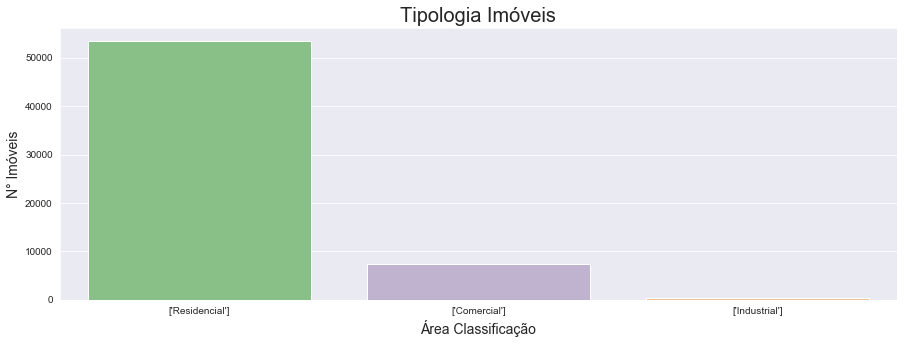

In [92]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

df_classificacao = pd.DataFrame(df_final['Classificacao'].value_counts())
df_classificacao.columns = ['Frequencia']
df_classificacao['Classificação'] = df_classificacao.index
sns.barplot(x="Classificação", y="Frequencia", data=df_classificacao)
axes.set_title('Tipologia Imóveis', fontsize = 20)
axes.set_ylabel('N° Imóveis', fontsize = 14)
axes.set_xlabel('Área Classificação', fontsize = 14)



### Localização

Text(0.5, 0, 'Longitude')

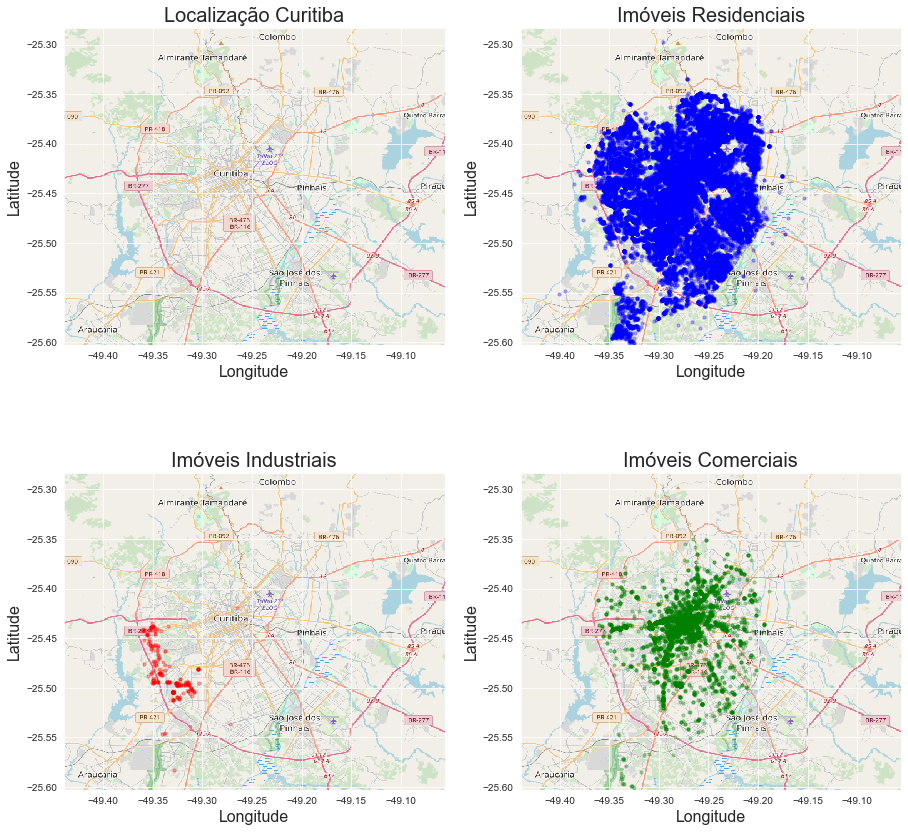

In [93]:
fig = plt.figure(figsize=(15,15))

BB = (-49.4392, -49.0560, -25.6026, -25.2834)

g0 = fig.add_subplot(2, 2, 1)
g0.imshow(Curitiba, zorder=0, extent=BB)
g0.set_xlim((BB[0], BB[1]))
g0.set_ylim((BB[2], BB[3]))
g0.set_title('Localização Curitiba', fontsize = 20)
g0.set_ylabel('Latitude', fontsize = 16)
g0.set_xlabel('Longitude', fontsize = 16)


g1 = fig.add_subplot(2, 2, 2)
g1.scatter(df_final[df_final['Classificacao'] == "['Residencial']"].longitude, df_final[df_final['Classificacao'] == "['Residencial']"].latitude, zorder=1, alpha=0.3, c='b', s=10)
g1.imshow(Curitiba, zorder=0, extent=BB)
g1.set_xlim((BB[0], BB[1]))
g1.set_ylim((BB[2], BB[3]))
g1.set_title('Imóveis Residenciais', fontsize = 20)
g1.set_ylabel('Latitude', fontsize = 16)
g1.set_xlabel('Longitude', fontsize = 16)

g2 = fig.add_subplot(2, 2, 3)
g2.scatter(df_final[df_final['Classificacao'] == "['Industrial']"].longitude, df_final[df_final['Classificacao'] == "['Industrial']"].latitude, zorder=1, alpha=0.3, c='r', s=10)
g2.imshow(Curitiba, zorder=0, extent=BB)
g2.set_xlim((BB[0], BB[1]))
g2.set_ylim((BB[2], BB[3]))
g2.set_title('Imóveis Industriais', fontsize = 20)
g2.set_ylabel('Latitude', fontsize = 16)
g2.set_xlabel('Longitude', fontsize = 16)


g3 = fig.add_subplot(2, 2, 4)
g3.scatter(df_final[df_final['Classificacao'] == "['Comercial']"].longitude, df_final[df_final['Classificacao'] == "['Comercial']"].latitude, zorder=1, alpha=0.3, c='g', s=10)
g3.imshow(Curitiba, zorder=0, extent=BB)
g3.set_xlim((BB[0], BB[1]))
g3.set_ylim((BB[2], BB[3]))
g3.set_title('Imóveis Comerciais', fontsize = 20)
g3.set_ylabel('Latitude', fontsize = 16)
g3.set_xlabel('Longitude', fontsize = 16)

### 1° Hipótese

Podemos perceber uma zona indutrial a oeste da cidade. Normalmente em grandes metrópoles, esses são locais onde o preço dos imóveis é menor. Já no centro da cidade existe uma forte concentração de imóveis comerciais. Em teoria essa área deveria ser mais valorizada.

In [134]:
# Área supostamente desvalorizada
Longitude = [-49.36, -49.34]
Latitude = [-25.50, -25.45]
BB = (-49.36, -49.34, -25.50, -25.45)

selecao = (df_final['longitude'] >=BB[0]) & (df_final['longitude'] <=BB[1]) & (df_final['latitude'] >=BB[2]) & (df_final['latitude'] <=BB[3])

df_area_desvalorizada = df_final[selecao]

Longitude = [-49.30, -49.25]
Latitude = [-25.45, -25.43]
BB = (-49.30, -49.25, -25.45, -25.43)

selecao = (df_final['longitude'] >=BB[0]) & (df_final['longitude'] <=BB[1]) & (df_final['latitude'] >=BB[2]) & (df_final['latitude'] <=BB[3])
df_area_valorizada = df_final[selecao]

selecao = (df_area_desvalorizada['Classificacao'] == "['Residencial']") & (df_area_desvalorizada['tipo_negocio'] == 'Venda')
df_area_desvalorizada = df_area_desvalorizada[selecao]

selecao = (df_area_valorizada['Classificacao'] == "['Residencial']") & (df_area_valorizada['tipo_negocio'] == 'Venda')
df_area_valorizada = df_area_valorizada[selecao]

media_1 = round(df_area_desvalorizada.valor.mean(),2)
media_2 = round(df_area_valorizada.valor.mean(),2)

mediana_1 = round(df_area_desvalorizada.valor.median(),2)
mediana_2 = round(df_area_valorizada.valor.median(),2)

print(f'Preço médio da área industrial R$ {media_1 :,}, mediana igual a R$ {mediana_1:,}')
print(f'Preço médio da área centro R$ {media_2 :,}, mediana igual a R$ {mediana_2 :,} ')



Preço médio da área industrial R$ 268,641.61, mediana igual a R$ 160,000.0
Preço médio da área centro R$ 537,672.49, mediana igual a R$ 469,000.0 


Text(0.5, 0, 'Longitude')

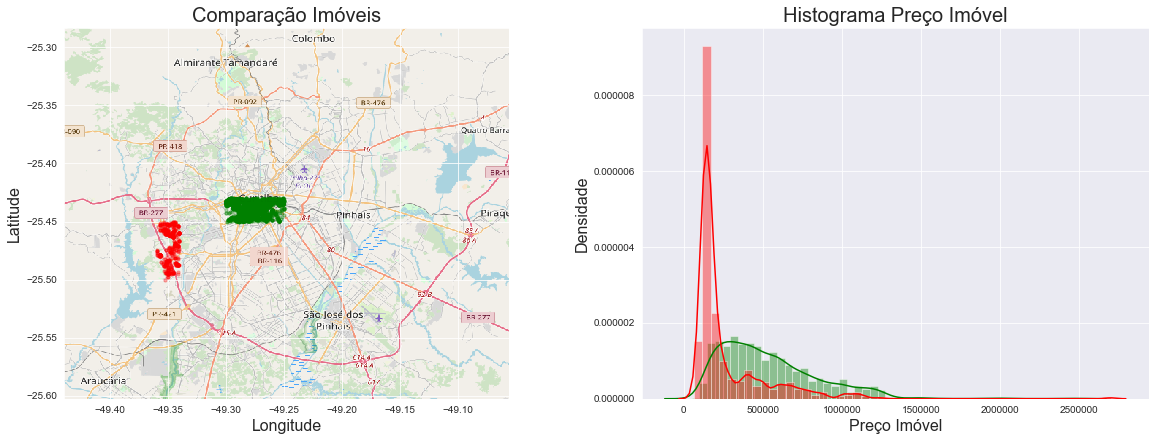

In [95]:
BB = (-49.4392, -49.0560, -25.6026, -25.2834)

fig = plt.figure(figsize=(20,15))


g0 = fig.add_subplot(2, 2, 2)
sns.distplot(df_area_valorizada['valor'], color='green', label="Centro")
sns.distplot(df_area_desvalorizada['valor'], color='red', label="Industria")
g0.set_title('Histograma Preço Imóvel', fontsize = 20)
g0.set_ylabel('Densidade', fontsize = 16)
g0.set_xlabel('Preço Imóvel', fontsize = 16)



g1 = fig.add_subplot(2, 2, 1)
g1.scatter(df_area_valorizada.longitude, df_area_valorizada.latitude, zorder=1, alpha=0.3, c='green', s=10)
g1.scatter(df_area_desvalorizada.longitude, df_area_desvalorizada.latitude, zorder=1, alpha=0.3, c='r', s=10)
g1.imshow(Curitiba, zorder=0, extent=BB)
g1.set_xlim((BB[0], BB[1]))
g1.set_ylim((BB[2], BB[3]))
g1.set_title('Comparação Imóveis', fontsize = 20)
g1.set_ylabel('Latitude', fontsize = 16)
g1.set_xlabel('Longitude', fontsize = 16)


Olhando o histograma das duas áreas, percebemos que os valores da região do centro estão de fato mais deslocadas para a direita. E mesmo que essa região possua alguns terrenos de valor elevado (acima de 10 milhões), a mediana também superior a zona oeste. Logo, a nossa 1° hipótese levantada parece estar correta.

# Imóveis Residenciais

Como grande parte da base esta relacionada aos imóveis residencias, daremos foco a esse setor.

In [96]:
selecao = df_final['Classificacao'] == "['Residencial']"
df_residencial = df_final[selecao]

### Locação e Venda

Grande parte dos brasileiros tem o sonho de vida comprar um apartamento próprio. Outros acreditam que o dinheiro gasto com aluguel é um desperdício, e logo, a decisão mais lógica seria financiar um apartamento. Vamos entender melhor como estão dispostos as resisdências nesse quesito.

In [97]:
# Imóveis Venda
selecao = df_residencial['tipo_negocio'] == 'Venda'
df_residencial_venda = df_residencial[selecao]
# Imóveis Aluguel
selecao = df_residencial['tipo_negocio'] == 'Locação'
df_residencial_locacao = df_residencial[selecao]

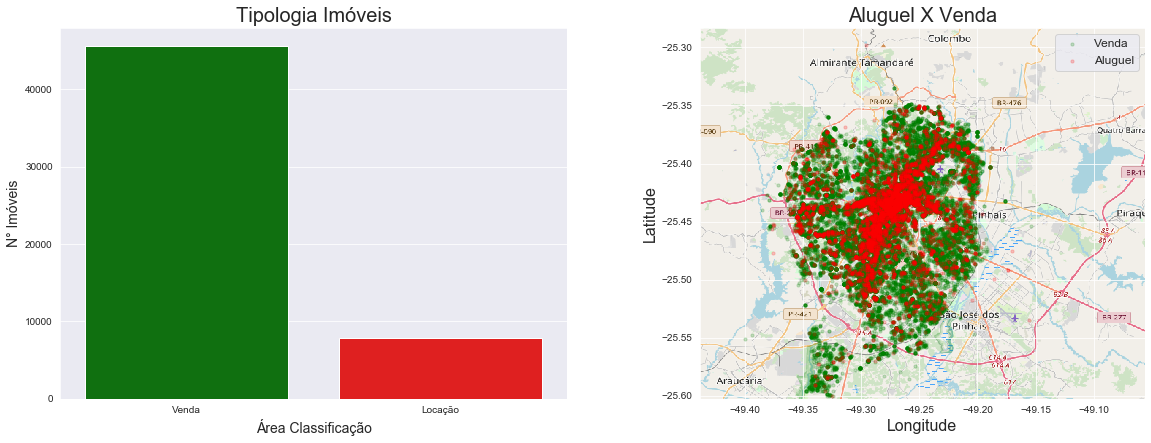

In [98]:
BB = (-49.4392, -49.0560, -25.6026, -25.2834)

fig = plt.figure(figsize=(20,15))

g0 = fig.add_subplot(2, 2, 1)
df_tipo_negocio = pd.DataFrame(df_residencial['tipo_negocio'].value_counts())
df_tipo_negocio.columns = ['Frequencia']
df_tipo_negocio['Tipo_Negocio'] = df_tipo_negocio.index
sns.barplot(x="Tipo_Negocio", y="Frequencia", data=df_tipo_negocio, palette=['green','red'] )
g0.set_title('Tipologia Imóveis', fontsize = 20)
g0.set_ylabel('N° Imóveis', fontsize = 14)
g0.set_xlabel('Área Classificação', fontsize = 14)

g1 = fig.add_subplot(2, 2, 2)
g1.scatter(df_residencial_venda.longitude, df_residencial_venda.latitude, zorder=1, alpha=0.2, c='g', s=10, label='Venda')
g1.scatter(df_residencial_locacao.longitude, df_residencial_locacao.latitude, zorder=1, alpha=0.2, c='r', s=10, label='Aluguel')
g1.imshow(Curitiba, zorder=0, extent=BB)
g1.set_xlim((BB[0], BB[1]))
g1.set_ylim((BB[2], BB[3]))
g1.set_title('Aluguel X Venda', fontsize = 20)
g1.set_ylabel('Latitude', fontsize = 16)
g1.set_xlabel('Longitude', fontsize = 16)
g1.legend(fontsize = 12)

Em uma viusalização qualitativa a partir do mapa, é possível perceber a concetração de imóveis para aluguel no centro. Isso corrobora com a nossa 1° hipótese estar correta, pois locais com alta demanda de aluguel geralmente possuem preço de imóveis elevados.

### 2° Hipótese

É possível perceber que alguns imóveis tem disponibilidade tanto para alugar quanto para compra. Nessa situação, qual seria a melhor opção? Algums pessoas dizem que para cogitar a compra do imóvel, o valor do aluguel deve ser superior a 0,5% o valor de venda. Fazendo contas de uma forma minimalista, com essa taxa, apenas depois de 12 anos você teria acumulado o valor total para compra do imóvel. Isso é, considerando que não haja valorização/depreciação do imóvel ao longo dos anos.

Vamos contruir um gráfico traçando uma barreira de decisão, onde imóveis situados abaixo dessa linha seriam mais interessante realizar a compra. Em contrapartida, imóveis acima da linha deveriam ser alugados.

In [99]:
df_residencial.head()

error  uf  longitude                                                url  \
0    []  PR -49.278522  http://www.redebee.com.br/imovel/apartamento-r...   
1    []  PR -49.277923  http://www.redebee.com.br/imovel/apartamento-3...   
2    []  PR -49.245331  http://www.redebee.com.br/imovel/cobertura-res...   
3    []  PR -49.246334  http://www.dimensaoimoveis.com.br/imovel/apart...   
4    []  PR -49.289577  http://www.redebee.com.br/imovel/apartamento-r...   

                                            geometry  condominio    cidade_uf  \
0  {'type': 'Point', 'coordinates': [-49.27852249...      590.00  curitiba_pr   
1  {'type': 'Point', 'coordinates': [-49.2779229,...      380.00  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.24533081...      500.00  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.2463338,...      150.00  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.28957748...      338.89  curitiba_pr   

                                            scraping         default  \
0  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'dimensaoimoveis_sao_jose_dos_...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
0      131.0       131.0     (41) 99165-0629     1590.0     False   
1       59.0       104.0     (41) 99165-0629   260000.0     False   
2      145.0       248.0     (41) 99165-0629  1030000.0     False   
3       60.0        60.0      (41) 3314-9400   259000.0     False   
4       55.0        84.0     (41) 99165-0629   230000.0     False   

   isparticular                      nome_corretor  banheiro tipo_negocio  \
0         False        Gomes Consultor Imobiliário       2.0      Locação   
1         False                          Otimóveis       1.0        Venda   
2         False  Mota Empreendimentos Imobiliários       3.0        Venda   
3         False                                NaN       2.0        Venda   
4         False        Tantus Corretora de Imóveis       2.0        Venda   

   quarto  status                                              title  \
0     2.0       1  Apartamento de 131 m² na Rua Comendador Araújo...   
1     3.0       1  Apartamento de 59 m² Água Verde - Curitiba, à ...   
2     3.0       1  Cobertura de 145 m² na Rua Fernandes de Barros...   
3     2.0       1  Apartamento de 60 m² na Rua Vicente Ciccarino ...   
4     2.0       1  Apartamento de 55 m² na Rua Lothario Boutin, 2...   

                                           opcionais   latitude  \
0  [{'location': ['imovel'], 'category': 'Serviço... -25.435591   
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.453071   
2  [{'location': ['imovel'], 'category': 'Cômodo'... -25.416845   
3  [{'location': ['imovel'], 'category': 'Acabame... -25.392791   
4  [{'location': ['imovel', 'edificio'], 'categor... -25.509201   

                                              cidade  \
0  {'short_name': 'Curitiba', 'full_name': 'Curit...   
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
0  Prezado (a) Senhor (a). Muito obrigado por ent...   
1  Apartamento 3 quartos no bairro Vila Izabel em...   
2  Cobertura nova à venda com três quartos no Hug...   
3  EDIFÍCIO RESIDENCIAL BELLE VIE\rRua Vicente Ci...   
4  Excelente Apartamento com 02 dormitórios (1 su...   

                                         lista_fotos  \
0  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['ht

In [100]:
# Selecionar todas as colunas com mesmo valor de endereço, IPTU, localização e Titulo:
lista_colunas_duplicadas = ['latitude', 'longitude', 'condominio', 'endereco', 'iptu', 'title']
df_residencial_aluguel_compra = df_residencial[df_residencial.duplicated(lista_colunas_duplicadas,keep=False)]
df_residencial_aluguel_compra.shape[0] 

7645

In [101]:
# Construindo Data Frame com Imóveis para Aluguel e Imóveis para Compra
df_residencial_aluguel_duplicado = df_residencial_aluguel_compra[df_residencial_aluguel_compra['tipo_negocio']=='Locação']
df_residencial_compra_duplicado = df_residencial_aluguel_compra[df_residencial_aluguel_compra['tipo_negocio']=='Venda']

In [102]:
# Agrupando Imóveis com mesmo localização e Retirando a média de preço Aluguel:
df_auxiliar_aluguel = df_residencial_aluguel_duplicado.groupby(['latitude', 'longitude', 'condominio', 'endereco', 'iptu', 'title'])[['valor']].mean()
df_auxiliar_aluguel

valor
latitude   longitude  condominio endereco                         iptu title                                                          
-25.544493 -49.265777 250.0      R. Tijucas do Sul                0.0  Locacao Apartamento Curitiba PR                      718.500000
-25.534048 -49.237015 230.0      R. Francisco Derosso, 6275       47.0 Excelente apartamento novo                           800.000000
-25.529324 -49.236642 0.0        R. Jerusalém, 498                27.0 Sobrados ALTO BOQUEIRAO                             1050.000000
-25.527015 -49.261341 0.0        R. Leonardo Bonato, 42           0.0  Casa nova no Xaxim com 2 dormitórios e preparaç...   950.000000
-25.525003 -49.238383 0.0        R. Paulo Setúbal, 5671           0.0  Apartamento residencial para locação, Boqueirão...  1050.000000
...                                                                                                                                ...
-25.384535 -49.224749 150.0      R. Nicolau Salomão               53.0 Apartamento residencial para locação, Tingui, C...   645.000000
-25.377585 -49.232381 0.0        Rua Coronel Wallace Scott Murray 0.0  Apartamento com 1 dormitório para alugar, 45 m²...   825.000000
-25.376896 -49.264594 0.0        R. Reinaldo Hecke, 206           0.0  Terreno SAO LOURENCO                                1500.000000
-25.376838 -49.261680 283.0      R. Maria de Lourdes Kudri, 127   0.0  Apartamento BARREIRINHA                              550.000000
-25.354652 -49.240284 220.0      Rua Padre Paulo Canelles         40.0 APTOS NOVOS, PRONTO PARA MORAR, 1ª LOCAÇÃO, APR...   666.666667

[122 rows x 1 columns]

In [103]:
# Agrupando Imóveis com mesmo localização e Retirando a média de preço Venda:
df_auxiliar_compra =df_residencial_compra_duplicado.groupby(['latitude', 'longitude', 'condominio', 'endereco', 'iptu', 'title'])[['valor']].mean()
df_auxiliar_compra

valor
latitude   longitude  condominio endereco                            iptu title                                                       
-25.598397 -49.329945 0.0        R. Alda Bassete Bertholdi, 559      0.0  Terreno residencial à venda, Campo de Santana, ...  100643.5
-25.594793 -49.337777 0.0        R. Maria Luzardi Bertoldi           0.0  Apartamento para Venda em Curitiba, Rio Bonito,...  144900.0
-25.592867 -49.337879 0.0        R. Augusto Bertoldi, 1032           0.0  Casa para Venda em Curitiba, Campo de Santana, ...  145000.0
-25.591303 -49.331872 20.0       R. Alda Bassete Bertholdi           0.0  Vendas Casa Curitiba PR                             135000.0
-25.590857 -49.339758 0.0        R. Palmyra Crivellaro Bertolde, 666 0.0  Casa para Venda em Curitiba, Campo de Santana, ...  162000.0
...                                                                                                                                ...
-25.355577 -49.276598 280.0      Rua Victor Kotovis, 450             10.0 TERRENO ABRANCHES                                   114500.0
-25.354835 -49.233768 260.0      R. Wallace Landal                   0.0  Apartamento residencial à venda, Santa Cândida,...  134500.0
-25.354501 -49.266500 0.0        Rua João Barwik, 253                0.0  Sobrado residencial à venda, Cachoeira, Curitiba.   332500.0
-25.353263 -49.256344 200.0      R. David Bodziak                    0.0  Apartamento residencial à venda, Cachoeira, Cur...  139500.0
-25.352328 -49.246354 0.0        Rua Alberto Otto, 1316              0.0  Apartamento a Venda em Curitiba, Santa Cândida,...  149000.0

[1752 rows x 1 columns]

In [104]:
# Cruzando valores da tabela de compra com a de aluguel
df_auxiliar_aluguel['valor_compra']= df_auxiliar_aluguel.index.map(df_auxiliar_compra.valor)
df_auxiliar_aluguel.head()

valor  \
latitude   longitude  condominio endereco                   iptu title                                                        
-25.544493 -49.265777 250.0      R. Tijucas do Sul          0.0  Locacao Apartamento Curitiba PR                      718.5   
-25.534048 -49.237015 230.0      R. Francisco Derosso, 6275 47.0 Excelente apartamento novo                           800.0   
-25.529324 -49.236642 0.0        R. Jerusalém, 498          27.0 Sobrados ALTO BOQUEIRAO                             1050.0   
-25.527015 -49.261341 0.0        R. Leonardo Bonato, 42     0.0  Casa nova no Xaxim com 2 dormitórios e preparaç...   950.0   
-25.525003 -49.238383 0.0        R. Paulo Setúbal, 5671     0.0  Apartamento residencial para locação, Boqueirão...  1050.0   

                                                                                                                     valor_compra  
latitude   longitude  condominio endereco                   iptu title                                                             
-25.544493 -49.265777 250.0      R. Tijucas do Sul          0.0  Locacao Apartamento Curitiba PR                              NaN  
-25.534048 -49.237015 230.0      R. Francisco Derosso, 6275 47.0 Excelente apartamento novo                              200000.0  
-25.529324 -49.236642 0.0        R. Jerusalém, 498          27.0 Sobrados ALTO BOQUEIRAO                                      NaN  
-25.527015 -49.261341 0.0        R. Leonardo Bonato, 42     0.0  Casa nova no Xaxim com 2 dormitórios e preparaç...      259000.0  
-25.525003 -49.238383 0.0        R. Paulo Setúbal, 5671     0.0  Apartamento residencial para locação, Boqueirão...           NaN

In [105]:
# Apenas valores com referencia
selecao = df_auxiliar_aluguel['valor_compra'].isnull()
df_grafico_compracao = df_auxiliar_aluguel[~selecao]
len(df_grafico_compracao)

44

Nesse caso temos 44 imóveis com valores de aluguel e venda. Vamos construir um gráfico com a barreira de decisão para entender se a melhor opção é comprar ou alugar. 

In [106]:
# Descobrindo amplitude de X e y teste
x_min = df_grafico_compracao['valor'].min()
x_max = df_grafico_compracao['valor'].max()
y_min = df_grafico_compracao['valor_compra'].min()
y_max = df_grafico_compracao['valor_compra'].max()
print(x_min, x_max,y_min,y_max)

380.0 7500.0 85000.0 1898000.0


In [107]:
# Construindo array com intervalo de 100 valores
pixels = 1000
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [108]:
# Replicando cada array 100 vezes
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [109]:
# Concatenando os 100 arrays em apenas 1 (função ravel) e juntando os dois para construir um par (semehantes aos cross join) 
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[3.800000e+02, 8.500000e+04],
       [3.871200e+02, 8.500000e+04],
       [3.942400e+02, 8.500000e+04],
       ...,
       [7.478640e+03, 1.896187e+06],
       [7.485760e+03, 1.896187e+06],
       [7.492880e+03, 1.896187e+06]])

In [110]:
# Construindo Função de Comparação
def aluguelXcompra(aluguel,preco):
    if preco*0.05 > aluguel:
        return 1
    else:
        return 0

In [111]:
# Retornando dados
Resultado = []
for ponto in pontos:
    x,y = ponto
    Resultado.append(aluguelXcompra(x,y))

In [112]:
Resultado = np.array(Resultado)
Resultado = Resultado.reshape(xx.shape)
Resultado

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

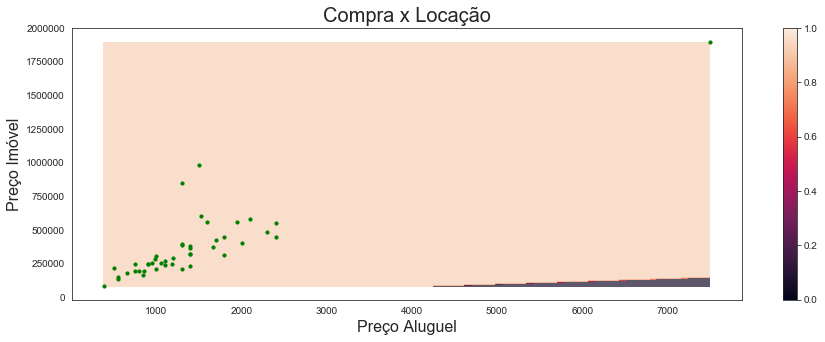

In [113]:
sns.set_style(style='white')
f, axes = plt.subplots(1, 1, figsize=(15, 5))

plt.contourf(xx, yy, Resultado, alpha=0.7)
plt.scatter(df_grafico_compracao['valor'], df_grafico_compracao['valor_compra'], s=10, color=['green'])
axes.set_title('Compra x Locação', fontsize = 20)
axes.set_ylabel('Preço Imóvel', fontsize = 16)
axes.set_xlabel('Preço Aluguel', fontsize = 16)
plt.colorbar()

Como pela nossa função {1 = Recomendação de Alugar, 0 = Recomendação de Comprar}, todos os pontos estão localizados na área amarela do gráfico, onde é recomendado que o indivíduo alugue o imóvel ao invés de realizar a compra. Isso é muito curioso pois a maioria das pessoas pensa sempre de forma oposta.

## Tipologia Imóveis Residenciais

Text(0.5, 0, 'Área Classificação')

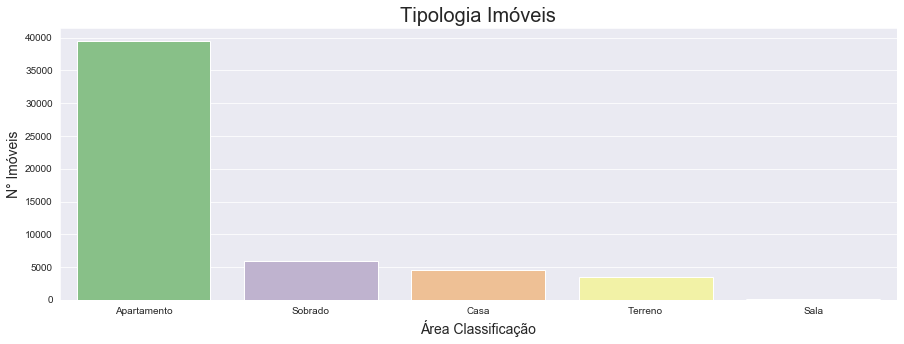

In [114]:
sns.set_style("darkgrid")

f, axes = plt.subplots(1, 1, figsize=(15, 5))

df_tipo_imovel = pd.DataFrame(df_residencial['tipo_imovel_2'].value_counts())
df_tipo_imovel.columns = ['Frequencia']
df_tipo_imovel['Tipo_Imóvel'] = df_tipo_imovel.index
sns.barplot(x="Tipo_Imóvel", y="Frequencia", data=df_tipo_imovel)
axes.set_title('Tipologia Imóveis', fontsize = 20)
axes.set_ylabel('N° Imóveis', fontsize = 14)
axes.set_xlabel('Área Classificação', fontsize = 14)

### Disposição de Imóveis (Localozação)

In [115]:
df_residencial['tipo_imovel_2'].value_counts()

Apartamento    39507
Sobrado         5924
Casa            4504
Terreno         3441
Sala              85
Name: tipo_imovel_2, dtype: int64

Text(0.5, 0, 'Longitude')

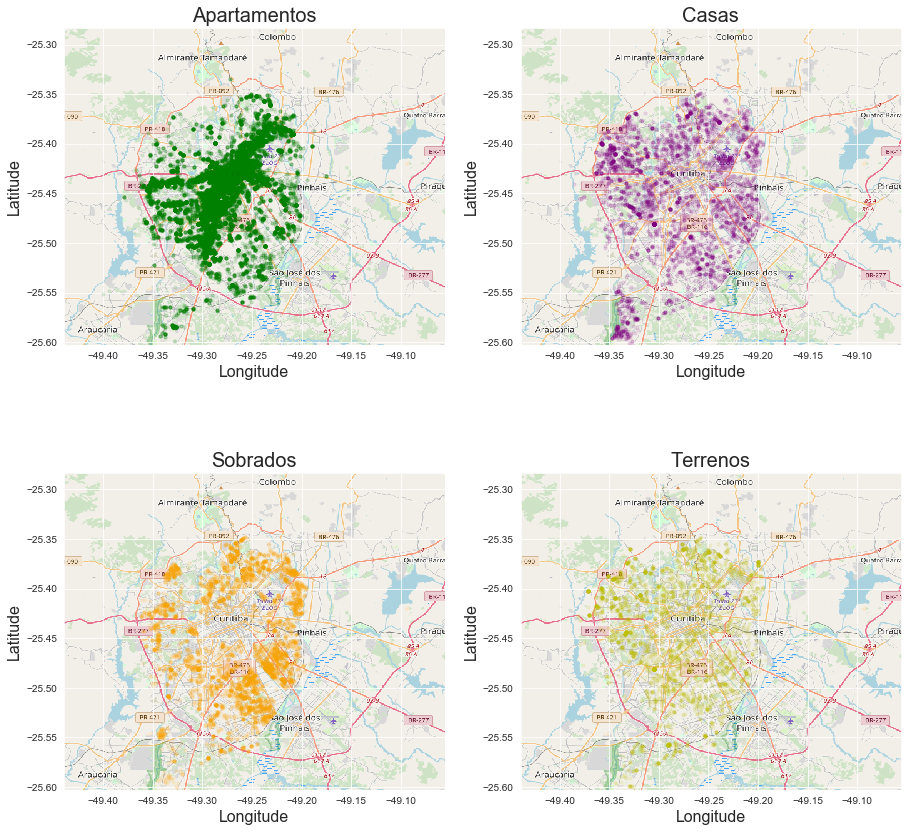

In [116]:
fig = plt.figure(figsize=(15,15))

g1 = fig.add_subplot(2, 2, 1)
g1.scatter(df_residencial[df_residencial['tipo_imovel_2'] == 'Apartamento'].longitude, df_residencial[df_residencial['tipo_imovel_2'] == 'Apartamento'].latitude, zorder=1, alpha=0.1, c='green', s=10)
g1.imshow(Curitiba, zorder=0, extent=BB)
g1.set_xlim((BB[0], BB[1]))
g1.set_ylim((BB[2], BB[3]))
g1.set_title('Apartamentos', fontsize = 20)
g1.set_ylabel('Latitude', fontsize = 16)
g1.set_xlabel('Longitude', fontsize = 16)


g2 = fig.add_subplot(2, 2, 2)
g2.scatter(df_residencial[df_residencial['tipo_imovel_2'] == 'Casa'].longitude, df_residencial[df_residencial['tipo_imovel_2'] == 'Casa'].latitude, zorder=1, alpha=0.1, c='purple', s=10)
g2.imshow(Curitiba, zorder=0, extent=BB)
g2.set_xlim((BB[0], BB[1]))
g2.set_ylim((BB[2], BB[3]))
g2.set_title('Casas', fontsize = 20)
g2.set_ylabel('Latitude', fontsize = 16)
g2.set_xlabel('Longitude', fontsize = 16)

g3 = fig.add_subplot(2, 2, 3)
g3.scatter(df_residencial[df_residencial['tipo_imovel_2'] == 'Sobrado'].longitude, df_residencial[df_residencial['tipo_imovel_2'] == 'Sobrado'].latitude, zorder=1, alpha=0.1, c='orange', s=10)
g3.imshow(Curitiba, zorder=0, extent=BB)
g3.set_xlim((BB[0], BB[1]))
g3.set_ylim((BB[2], BB[3]))
g3.set_title('Sobrados', fontsize = 20)
g3.set_ylabel('Latitude', fontsize = 16)
g3.set_xlabel('Longitude', fontsize = 16)

g4 = fig.add_subplot(2, 2, 4)
g4.scatter(df_residencial[df_residencial['tipo_imovel_2'] == 'Terreno'].longitude, df_residencial[df_residencial['tipo_imovel_2'] == 'Terreno'].latitude, zorder=1, alpha=0.1, c='y', s=10)
g4.imshow(Curitiba, zorder=0, extent=BB)
g4.set_xlim((BB[0], BB[1]))
g4.set_ylim((BB[2], BB[3]))
g4.set_title('Terrenos', fontsize = 20)
g4.set_ylabel('Latitude', fontsize = 16)
g4.set_xlabel('Longitude', fontsize = 16)


Realizando uma analise quantitativa sobre os mapas, percebemos uma grande concentração de apartamentos no centro da cidade, caracterizando um local mais adensado.

## Apartamentos

Como esse é o grupo que mais temos informações, vamos concentrar as analises nesse setor.

In [117]:
selecao = df_residencial_venda['tipo_imovel_2'] == 'Apartamento'
df_apartamentos_venda = df_residencial_venda[selecao]
df_apartamentos_venda.head()

error  uf  longitude                                                url  \
1    []  PR -49.277923  http://www.redebee.com.br/imovel/apartamento-3...   
2    []  PR -49.245331  http://www.redebee.com.br/imovel/cobertura-res...   
3    []  PR -49.246334  http://www.dimensaoimoveis.com.br/imovel/apart...   
4    []  PR -49.289577  http://www.redebee.com.br/imovel/apartamento-r...   
5    []  PR -49.254654  http://www.redebee.com.br/imovel/apartamento-r...   

                                            geometry  condominio    cidade_uf  \
1  {'type': 'Point', 'coordinates': [-49.2779229,...      380.00  curitiba_pr   
2  {'type': 'Point', 'coordinates': [-49.24533081...      500.00  curitiba_pr   
3  {'type': 'Point', 'coordinates': [-49.2463338,...      150.00  curitiba_pr   
4  {'type': 'Point', 'coordinates': [-49.28957748...      338.89  curitiba_pr   
5  {'type': 'Point', 'coordinates': [-49.25465393...     1166.99  curitiba_pr   

                                            scraping         default  \
1  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
2  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
3  {'spider_name': 'dimensaoimoveis_sao_jose_dos_...  ['finalidade']   
4  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   
5  {'spider_name': 'redebee_curitiba_pr', 'padrao...  ['finalidade']   

   area_util  area_total contato_imobiliaria      valor  isportal  \
1       59.0       104.0     (41) 99165-0629   260000.0     False   
2      145.0       248.0     (41) 99165-0629  1030000.0     False   
3       60.0        60.0      (41) 3314-9400   259000.0     False   
4       55.0        84.0     (41) 99165-0629   230000.0     False   
5      188.0       279.0     (41) 99165-0629   990000.0     False   

   isparticular                      nome_corretor  banheiro tipo_negocio  \
1         False                          Otimóveis       1.0        Venda   
2         False  Mota Empreendimentos Imobiliários       3.0        Venda   
3         False                                NaN       2.0        Venda   
4         False        Tantus Corretora de Imóveis       2.0        Venda   
5         False        Tantus Corretora de Imóveis       4.0        Venda   

   quarto  status                                              title  \
1     3.0       1  Apartamento de 59 m² Água Verde - Curitiba, à ...   
2     3.0       1  Cobertura de 145 m² na Rua Fernandes de Barros...   
3     2.0       1  Apartamento de 60 m² na Rua Vicente Ciccarino ...   
4     2.0       1  Apartamento de 55 m² na Rua Lothario Boutin, 2...   
5     3.0       1  Apartamento de 188 m² na Rua Chichorro Júnior,...   

                                           opcionais   latitude  \
1  [{'location': ['imovel'], 'category': 'Cômodo'... -25.453071   
2  [{'location': ['imovel'], 'category': 'Cômodo'... -25.416845   
3  [{'location': ['imovel'], 'category': 'Acabame... -25.392791   
4  [{'location': ['imovel', 'edificio'], 'categor... -25.509201   
5  [{'location': ['imovel'], 'category': 'Acabame... -25.406342   

                                              cidade  \
1  {'short_name': 'Curitiba', 'full_name': 'Curit...   
2  {'short_name': 'Curitiba', 'full_name': 'Curit...   
3  {'short_name': 'Curitiba', 'full_name': 'Curit...   
4  {'short_name': 'Curitiba', 'full_name': 'Curit...   
5  {'short_name': 'Curitiba', 'full_name': 'Curit...   

                                           descricao  \
1  Apartamento 3 quartos no bairro Vila Izabel em...   
2  Cobertura nova à venda com três quartos no Hug...   
3  EDIFÍCIO RESIDENCIAL BELLE VIE\rRua Vicente Ci...   
4  Excelente Apartamento com 02 dormitórios (1 su...   
5  Excelente apartamento reformado no bairro Cabr...   

                                         lista_fotos  \
1  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
2  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
3  ['https://imgbe.kenlo.com.br/VWRCUkQ2Tnp3d1BJR...   
4  ['ht

### Variáveis Discretas

Dentro da base de dados, diversas característcicas sobre o apartamento foram disponibilizadas, como N° Quarto, Garagens, Suítes e Banheiros. Como só podem assumir valores inteiros (não existe meio quarto), elas são variáveis consideradas discretas.

In [118]:
df_apartamento_venda_discreta = df_apartamentos_venda[['valor', 'banheiro', 'garagem', 'quarto', 'suite']] 

### 3° Hipótese

Em relação a esses quatro atributos é esperado que o valor do imóvel aumente com o aumento da quantidade dessas características. Será que isso é de fato acontece? Existe alguma relação entre preço e a quantidade desses quatro atributos? Vamos contruir 4 gráficos de correlação para endender melhor o comportamento.

Text(0.5, 1.08, 'Relacionamento Valor Imóvel x N° Quartos')

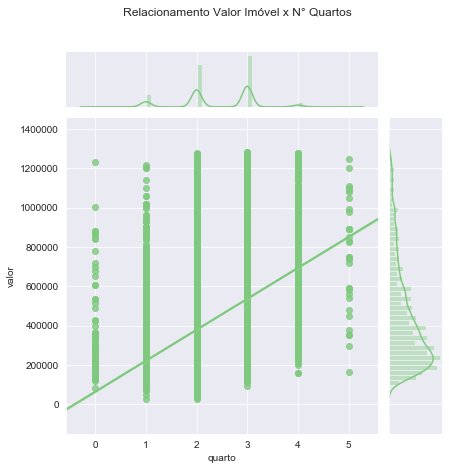

In [119]:
# Relacionamento Quartos
ax = sns.jointplot(x="quarto", y="valor",data=df_apartamento_venda_discreta, kind="reg")
ax.fig.suptitle("Relacionamento Valor Imóvel x N° Quartos", y=1.08)

Text(0.5, 1.08, 'Relacionamento Valor Imóvel x N° Banheiros')

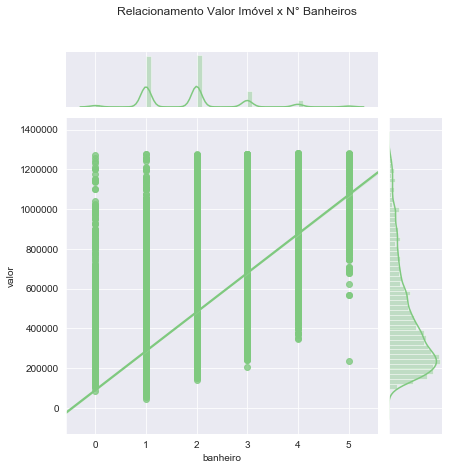

In [120]:
# Relacionamento Banheiro
ax = sns.jointplot(x="banheiro", y="valor",data=df_apartamento_venda_discreta, kind="reg")
ax.fig.suptitle("Relacionamento Valor Imóvel x N° Banheiros", y=1.08)

Text(0.5, 1.08, 'Relacionamento Valor Imóvel x N° Garagens')

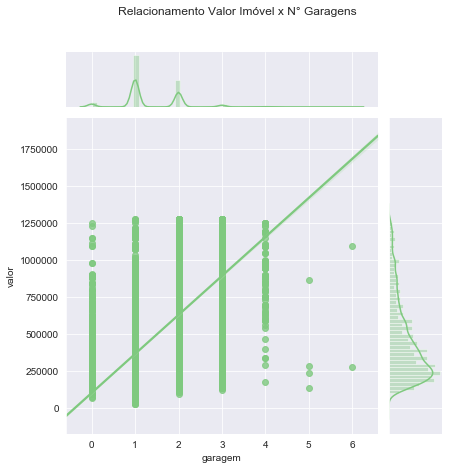

In [121]:
# Relacionamento Garagem
ax = sns.jointplot(x="garagem", y="valor",data=df_apartamento_venda_discreta, kind="reg")
ax.fig.suptitle("Relacionamento Valor Imóvel x N° Garagens", y=1.08)

Text(0.5, 1.08, 'Relacionamento Valor Imóvel x N° Suíte')

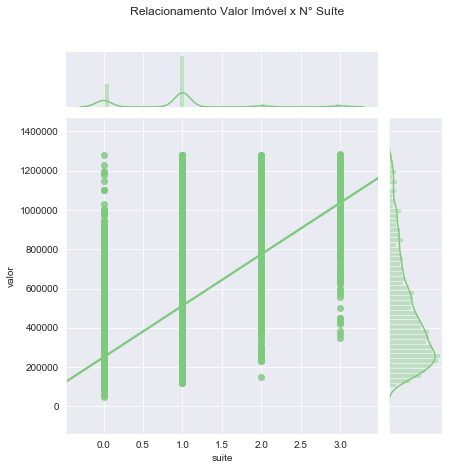

In [122]:
# Relacionamento Quartos
ax = sns.jointplot(x="suite", y="valor",data=df_apartamento_venda_discreta, kind="reg")
ax.fig.suptitle("Relacionamento Valor Imóvel x N° Suíte", y=1.08)

In [123]:
# Tabela de Correlação

corr = df_apartamento_venda_discreta.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

O gráfico de correlação indica que todas a variáveis tem um comportamento positivo em relação ao preço do imóvel. O item que mais pesa para aumento do preço do imóvel é o número de banheiros.

### Variáveis Opcionais (Booleanos)

Dentro das vairáveis opcionais, temos alguns itens que tendem a aumetar o valor do imóvel. Esses geralmente estão realcionados a entreterimento ou segurança. Com isso, vamos analisar dois itens relacionados a essas característas. Esses atríbutos serão classificados apenas como booleanos, ou seja, se o imóvel possui ou não a característica. 

### Piscina

Esse é um atributo muito desejado para vários brasileiros na hora de escolher suas moradias. Como será o comportamento dos preços desses imóveis?

In [124]:
selecao = df_apartamentos_venda['Piscina'] == 1
df_apartamentos_venda_pisicina = df_apartamentos_venda[selecao]
df_apartamentos_venda_Npisicina = df_apartamentos_venda[~selecao]

Text(0.5, 0, 'Preço Imóvel')

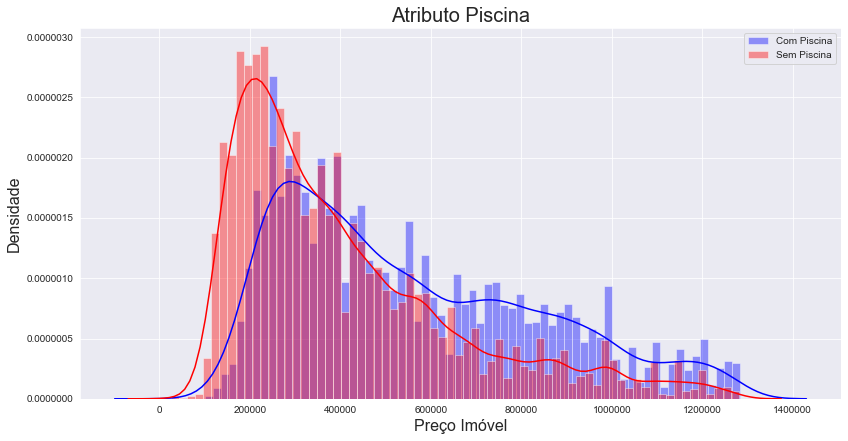

In [125]:
# Plotando Gráfico dos empreendimentos que possuem piscina  
fig = plt.figure(figsize=(30,15))


g0 = fig.add_subplot(2, 2, 1)
sns.distplot(df_apartamentos_venda_pisicina['valor'], color='blue', label="Com Piscina", bins = 70)
sns.distplot(df_apartamentos_venda_Npisicina['valor'], color='red', label="Sem Piscina", bins = 70)
plt.legend()
g0.set_title('Atributo Piscina', fontsize = 20)
g0.set_ylabel('Densidade', fontsize = 16)
g0.set_xlabel('Preço Imóvel', fontsize = 16)

In [126]:
media_1 = df_apartamentos_venda_pisicina['valor'].mean()
mediana_1 = df_apartamentos_venda_pisicina['valor'].median()
media_2 = df_apartamentos_venda_Npisicina['valor'].mean()
mediana_2 = df_apartamentos_venda_Npisicina['valor'].median()
diferença_1 = ((media_1/media_2)-1)*100
diferença_2 = ((mediana_1/mediana_2)-1)*100

print(f'A média e a mediana dos apartamentos sem piscina é igual a R${media_2 :,.2f} e R${mediana_2 :,.2f}, respectivamente')
print(f'A média e a mediana dos apartamentos com piscina é igual a R${media_1 :,.2f} e R${mediana_1 :,.2f}, respectivamente')
print(f'A diferença entre a média e a mediana dos apartamentos {diferença_1 :,.2f} % e {diferença_2 :,.2f} %, respectivamente')

A média e a mediana dos apartamentos sem piscina é igual a R$405,925.93 e R$330,000.00, respectivamente
A média e a mediana dos apartamentos com piscina é igual a R$555,754.76 e R$480,250.00, respectivamente
A diferença entre a média e a mediana dos apartamentos 36.91 % e 45.53 %, respectivamente


### Segurança 24h

Atributo vinculado a segurança do prédio. Prédios mais luxosos geralmente possuem uma portária 24h.

In [127]:
selecao = df_apartamentos_venda['Segurança'] == 1
df_apartamentos_venda_seguranca = df_apartamentos_venda[selecao]
df_apartamentos_venda_Nseguranca = df_apartamentos_venda[~selecao]

Text(0.5, 0, 'Preço Imóvel')

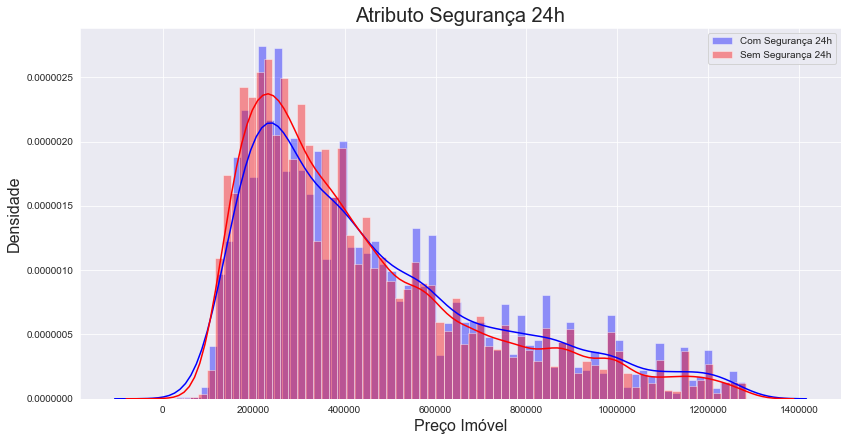

In [128]:
# Plotando Gráfico dos empreendimentos que possuem piscina  
fig = plt.figure(figsize=(30,15))


g0 = fig.add_subplot(2, 2, 1)
sns.distplot(df_apartamentos_venda_seguranca['valor'], color='blue', label="Com Segurança 24h", bins =70)
sns.distplot(df_apartamentos_venda_Nseguranca['valor'], color='red', label="Sem Segurança 24h", bins =70)
plt.legend()
g0.set_title('Atributo Segurança 24h', fontsize = 20)
g0.set_ylabel('Densidade', fontsize = 16)
g0.set_xlabel('Preço Imóvel', fontsize = 16)

In [129]:
media_1 = df_apartamentos_venda_seguranca['valor'].mean()
mediana_1 = df_apartamentos_venda_seguranca['valor'].median()
media_2 = df_apartamentos_venda_Nseguranca['valor'].mean()
mediana_2 = df_apartamentos_venda_Nseguranca['valor'].median()
diferença_1 = ((media_1/media_2)-1)*100
diferença_2 = ((mediana_1/mediana_2)-1)*100

print(f'A média e a mediana dos apartamentos sem segurança 24h é igual a R${media_2 :,.2f} e R${mediana_2 :,.2f}, respectivamente')
print(f'A média e a mediana dos apartamentos com segurança 24h é igual a R${media_1 :,.2f} e R${mediana_1 :,.2f}, respectivamente')
print(f'A diferença entre a média e a mediana dos apartamentos {diferença_1 :,.2f} % e {diferença_2 :,.2f} %, respectivamente.')

A média e a mediana dos apartamentos sem segurança 24h é igual a R$436,708.07 e R$359,000.00, respectivamente
A média e a mediana dos apartamentos com segurança 24h é igual a R$463,019.45 e R$387,300.00, respectivamente
A diferença entre a média e a mediana dos apartamentos 6.02 % e 7.88 %, respectivamente.


### Comparação Resultados

É possível perceber visualmente que os histogramas do atributo segurança estão mais sobrepostos. Suas médias e medianas também são mais semelhantes quando comparadas ao atributo piscina. Essa analise está indicando que talvez na hora de construir, faça mais sentido dar prioridade em itens relacionados ao entreterimento em detrimento da segurança.

## Variáveis Contínuas 

São valores que pertencem a um intervalo de números reais e representam uma mensuração como por exemplo altura ou peso de uma pessoa. Nesse caso temos área como m2. Vamos avaliar essa variável para entender como é o comportamento do preço por m2.

In [130]:
# Construindo DataFrame com média do valor_m2 por ponto no mapa
df_mapa_m2 = df_apartamentos_venda.groupby(['latitude_arred','longitude_arred'], as_index=False)['valor_m2'].mean()
df_mapa_m2

latitude_arred  longitude_arred     valor_m2
0            -25.599          -49.328  3389.613527
1            -25.595          -49.338  2432.372359
2            -25.594          -49.342  2410.541251
3            -25.592          -49.337  2840.903689
4            -25.590          -49.339  3149.037262
...              ...              ...          ...
3868         -25.351          -49.251  2805.707164
3869         -25.351          -49.234  2421.798770
3870         -25.351          -49.233  2894.248609
3871         -25.350          -49.251  2446.808511
3872         -25.335          -49.272  2379.171903

[3873 rows x 3 columns]

Text(0.5, 0, 'Longitude')

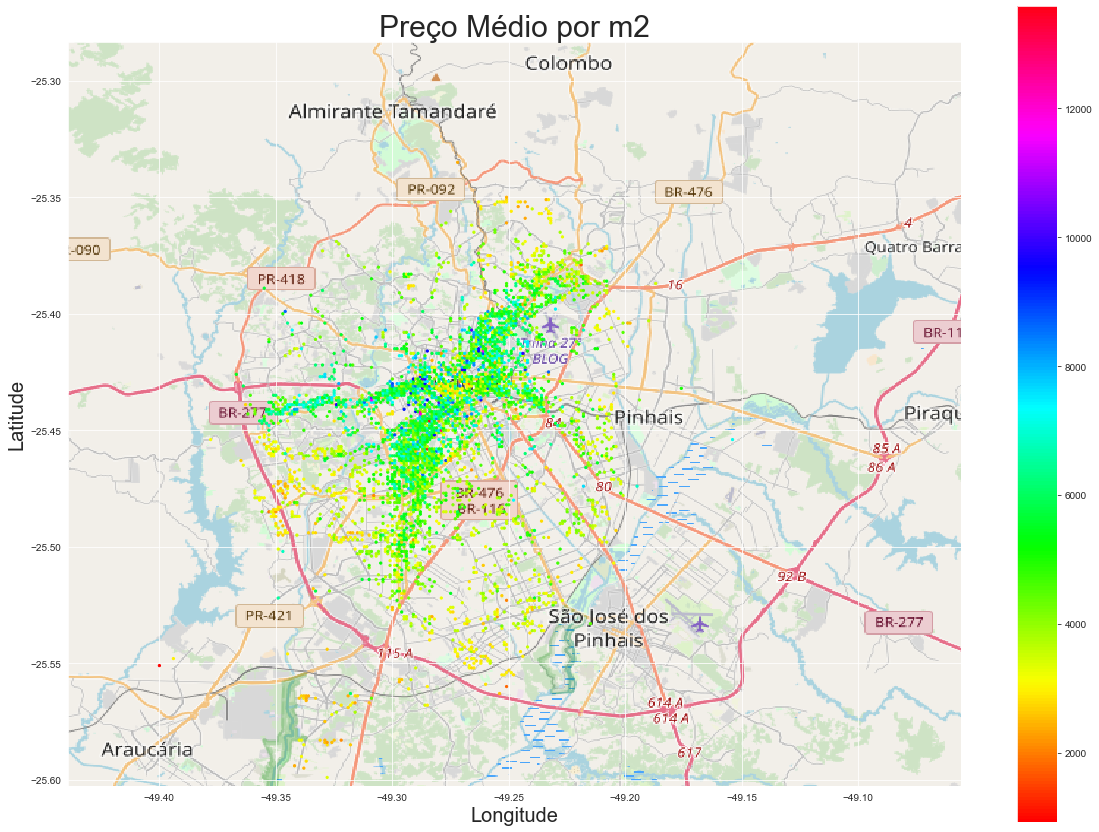

In [131]:
# Plotando os dados no mapa e construindo gráfico de calor
f, axes = plt.subplots(1, 1, figsize=(20, 15))

plt.scatter(df_mapa_m2.longitude_arred, df_mapa_m2.latitude_arred, zorder=1, alpha=1,s = 5, c = df_mapa_m2.valor_m2, cmap='hsv' )
plt.colorbar()
plt.imshow(Curitiba, zorder=0, extent=BB)
axes.set_xlim((BB[0], BB[1]))
axes.set_ylim((BB[2], BB[3]))
axes.set_title('Preço Médio por m2', fontsize = 30)
axes.set_ylabel('Latitude', fontsize = 20)
axes.set_xlabel('Longitude', fontsize = 20)



Como já era esperado, o preço médio do m2 no centro é maior do que nas demais localidades.